## **TFG BUNKER RETENCIÓN - INGENIERÍA DEL DATO 🛢**

 **1️⃣ ETL. EXTRACCIÓN, TRANSFORMACIÓN Y CARGA DE LOS DATOS**

 **2️⃣ EDA. ANALISIS EXPLORATORIO DE LOS DATOS**


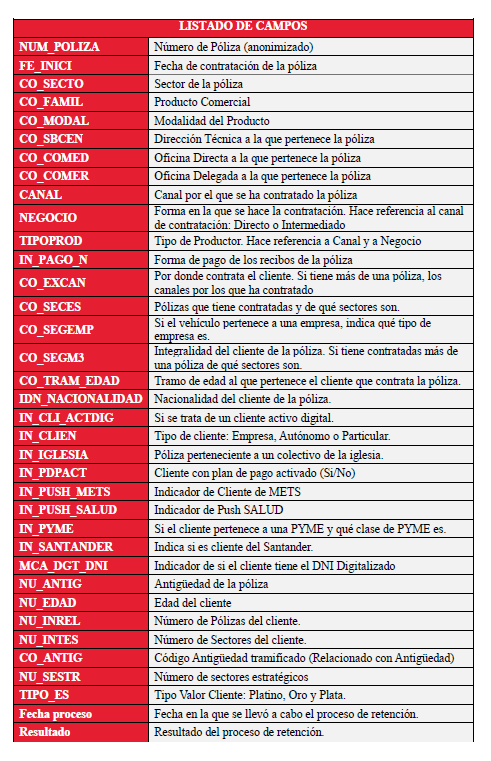

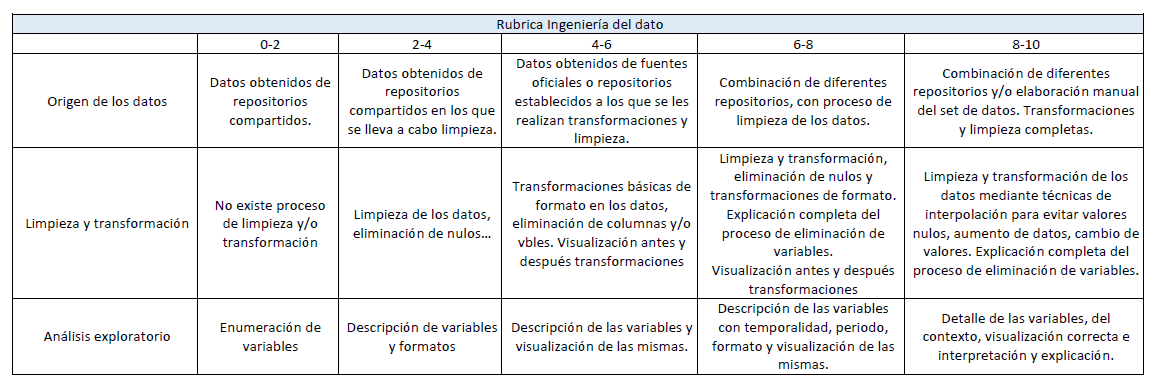

### 💭 **Anuncios:**


**Anuncio 1:**

•	Origen de los datos, mostrar de dónde han sido obtenidos mediante la web, captura de pantalla, funcionamiento del script de web scrapping, etc. 📝✅

•	Número de observaciones, número de variables, tipo de datos de cada una de ellas, formato. ✅

•	Periodicidad de los datos, intervalos de cada variable. ✅

•	Justificación elección de las variables y periodos. ✅

•	Explicación de medidas de tendencia central, dispersión y frecuencias. ✅

•	Gráficos descriptivos: Diagramas de dispersión, cajas que permitan la visualización de las variables, tendencias y relación de las variables entre ellas. ✅

•	Identificación de outliers, si es que los hay y medidas tomadas al respecto. ✅

•	Valores nulos y su sustitución. ✅

•	Almacenamiento de los datos para su posterior análisis. ✅

•	Resumen narrativo: Resumen escrito que incluya todas las medidas y observaciones derivadas del análisis. 📝✅

•	Nubes de palabras en el caso de texto. ❌

**Anuncio 2:**

Los apartados de la parte de ingeniería del dato deben incluir:

• Origen de los datos

• Características de los datos

• Estudio estadístico: Este debe hacerse teniendo en cuenta las variables, no quiere decir que haya que hacer medias y varianzas a todos los datos...

• Estudio descriptivo: Gráficos sobre la información que arrojan los datos, la evolución en los años, qué historia nos cuentan. En este punto nos ponéis en contexto vuestro trabajo.


### 📚 **Importación de librerías:**

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
# from skimpy import skim
import statsmodels.api as sm
import os
from datetime import datetime
import math
from sklearn.preprocessing import LabelEncoder
## La siguiente librería genera el informe html de pandas-profiling
# from pandas_profiling import ProfileReport
# from skimpy import skim

### 📥 **Importación de datos:**

In [2]:
datos = pd.read_excel(r"C:\Users\rlmart5\OneDrive - MAPFRE\Documentos\MARTA\UNIVERSIDAD\TFG\0. Ficheros datos\BBDD_TFG_v2.xlsx", sheet_name='BBDD')
display(datos)

,NUM_POLIZA,FE_INICI,CO_SECTO,CO_FAMIL,CO_MODAL,CO_SBCEN,CO_COMED,CO_COMER,CANAL,NEGOCIO,...,MCA_DGT_DNI,NU_ANTIG,NU_EDAD,NU_INREL,NU_INTES,CO_ANTIG,NU_SESTR,TIPO_ES,Resultado,Fecha proceso
0,1,02/10/19,A,AI,0,54,1920,1923,RED AGEN,INTERMEDIADO,...,X,3,49,2,2,2-4,2.0,3,VIGOR/COBRADO,2023/08/04
1,2,13/10/19,A,AI,0,33,3310,3288,RED AGEN,INTERMEDIADO,...,S,4,57,2,2,2-4,2.0,3,RESTO/RESTO,2023/09/15
2,3,08/08/05,A,AI,0,33,8216,8201,RED AGEN,INTERMEDIADO,...,S,32,54,3,2,> 7,2.0,3,VIGOR/COBRADO,2024/06/07
3,4,11/12/16,A,AN,0,6,618,618,RED AGEN,INTERMEDIADO,...,X,20,52,3,2,> 7,2.0,3,VIGOR/COBRADO,2023/11/14
4,5,08/11/19,A,AI,0,66,6114,6124,RED AGEN,INTERMEDIADO,...,X,3,40,1,1,2-4,1.0,3,RESTO/RESTO,2023/10/13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107961,107969,11/07/23,A,AN,0,46,4689,9056,RED AGEN,INTERMEDIADO,...,X,0,44,1,1,< 2,1.0,3,VIGOR/COBRADO,2024/05/30
107962,107970,14/07/23,A,AN,0,48,4827,4834,INTERNET-TELEFO,INTERMEDIADO,...,X,0,30,1,1,< 2,1.0,3,VIGOR/COBRADO,2024/05/09
107963,107971,19/07/23,A,AQ,0,41,4109,4171,RED AGEN,INTERMEDIADO,...,X,0,51,3,1,< 2,1.0,3,RESTO/RESTO,2024/05/13
107964,107972,26/07/23,A,AN,0,28,1221,5719,RED AGEN,INTERMEDIADO,...,S,2,60,1,1,2-4,1.0,3,RESTO/RESTO,2024/05/17


### 🔢🔠**Descripción de los datos:**

In [3]:
# Dimensión de los datos
datos.shape

(107966, 36)

In [4]:
# Información de los datos (nulos y tipo)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107966 entries, 0 to 107965
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NUM_POLIZA        107966 non-null  int64  
 1   FE_INICI          107966 non-null  object 
 2   CO_SECTO          107966 non-null  object 
 3   CO_FAMIL          107966 non-null  object 
 4   CO_MODAL          107966 non-null  int64  
 5   CO_SBCEN          107966 non-null  int64  
 6   CO_COMED          107966 non-null  int64  
 7   CO_COMER          107966 non-null  int64  
 8   CANAL             107966 non-null  object 
 9   NEGOCIO           107966 non-null  object 
 10  TIPOPROD          107966 non-null  object 
 11  IN_PAGO_N         107966 non-null  object 
 12  CO_EXCAN          107966 non-null  int64  
 13  CO_SECES          107966 non-null  object 
 14  CO_SEGEMP         1185 non-null    float64
 15  CO_SEGM3          107966 non-null  object 
 16  CO_TRAM_EDAD      10

In [5]:
# Descripción de los datos (recuento, media, std, minimo, maximo...)
datos.describe()

,NUM_POLIZA,CO_MODAL,CO_SBCEN,CO_COMED,CO_COMER,CO_EXCAN,CO_SEGEMP,IN_PYME,NU_ANTIG,NU_EDAD,NU_INREL,NU_INTES,NU_SESTR,TIPO_ES
count,107966.000000,107966.0,107966.000000,107966.000000,107966.000000,107966.000000,1185.000000,1146.000000,107966.000000,107966.000000,107966.000000,107966.000000,107963.000000,107966.000000
mean,53987.019775,0.0,35.299891,4080.178065,4538.879193,3.820092,1.535865,1.750436,9.892299,60.507317,1.987005,1.462757,1.409038,2.783589
std,31169.938500,0.0,21.777976,2714.981395,2691.500591,4.423247,0.782368,1.290416,10.229709,101.402522,1.605341,0.750083,0.676941,0.515391
min,1.000000,0.0,3.000000,13.000000,2.000000,0.000000,1.000000,1.000000,0.000000,10.000000,1.000000,1.000000,1.000000,1.000000
25%,26993.250000,0.0,18.000000,1422.000000,2119.000000,1.000000,1.000000,1.000000,2.000000,40.000000,1.000000,1.000000,1.000000,3.000000
50%,53986.500000,0.0,31.000000,3917.000000,4689.000000,1.000000,1.000000,1.000000,6.000000,50.000000,1.000000,1.000000,1.000000,3.000000
75%,80981.750000,0.0,47.000000,6280.000000,6758.000000,5.000000,2.000000,2.000000,16.000000,60.000000,2.000000,2.000000,2.000000,3.000000
max,107973.000000,0.0,92.000000,9991.000000,9991.000000,16.000000,5.000000,5.000000,82.000000,999.000000,99.000000,9.000000,6.000000,3.000000


#### **Cambios de formato:**


In [6]:
# Renombramos las columnas para que sean más fáciles de entender
nuevos_nombres = {
    "NUM_POLIZA": "Numero_Poliza",
    "FE_INICI": "Fecha_Contratacion",
    "CO_SECTO": "Sector_Poliza",
    "CO_FAMIL": "Producto_Comercial",
    "CO_MODAL": "Modalidad_Producto",
    "CO_SBCEN": "Direccion_Tecnica",
    "CO_COMED": "Oficina_Directa",
    "CO_COMER": "Oficina_Delegada",
    "CANAL": "Canal_Contratacion",
    "NEGOCIO": "Forma_Contratacion",
    "TIPOPROD": "Tipo_Productor",
    "IN_PAGO_N": "Forma_Pago",
    "CO_EXCAN": "Canal_Cliente",
    "CO_SECES": "Sectores_Contratados",
    "CO_SEGEMP": "Tipo_Empresa",
    "CO_SEGM3": "Integralidad_Cliente",
    "CO_TRAM_EDAD": "Tramo_Edad",
    "IDN_NACIONALIDAD": "Nacionalidad_Cliente",
    "IN_CLI_ACTDIG": "Cliente_Activo_Digital",
    "IN_CLIEN": "Tipo_Cliente",
    "IN_IGLESIA": "Cliente_Colectivo_Iglesia",
    "IN_PDPACT": "Plan_Pago_Activado",
    "IN_PUSH_METS": "Cliente_METS",
    "IN_PUSH_SALUD": "Cliente_Push_Salud",
    "IN_PYME": "Cliente_PYME",
    "IN_SANTANDER": "Cliente_Santander",
    "MCA_DGT_DNI": "DNI_Digitalizado",
    "NU_ANTIG": "Antiguedad_Poliza",
    "NU_EDAD": "Edad_Cliente",
    "NU_INREL": "Numero_Polizas",
    "NU_INTES": "Numero_Sectores",
    "CO_ANTIG": "Tramo_Antiguedad",
    "NU_SESTR": "Sectores_Estrategicos",
    "TIPO_ES": "Tipo_Valor_Cliente",
    "Fecha proceso": "Fecha_Proceso",
    "Resultado": "Resultado_Retencion"
}

datos.rename(columns=nuevos_nombres, inplace=True)
datos.head()


,Numero_Poliza,Fecha_Contratacion,Sector_Poliza,Producto_Comercial,Modalidad_Producto,Direccion_Tecnica,Oficina_Directa,Oficina_Delegada,Canal_Contratacion,Forma_Contratacion,...,DNI_Digitalizado,Antiguedad_Poliza,Edad_Cliente,Numero_Polizas,Numero_Sectores,Tramo_Antiguedad,Sectores_Estrategicos,Tipo_Valor_Cliente,Resultado_Retencion,Fecha_Proceso
0,1,02/10/19,A,AI,0,54,1920,1923,RED AGEN,INTERMEDIADO,...,X,3,49,2,2,2-4,2.0,3,VIGOR/COBRADO,2023/08/04
1,2,13/10/19,A,AI,0,33,3310,3288,RED AGEN,INTERMEDIADO,...,S,4,57,2,2,2-4,2.0,3,RESTO/RESTO,2023/09/15
2,3,08/08/05,A,AI,0,33,8216,8201,RED AGEN,INTERMEDIADO,...,S,32,54,3,2,> 7,2.0,3,VIGOR/COBRADO,2024/06/07
3,4,11/12/16,A,AN,0,6,618,618,RED AGEN,INTERMEDIADO,...,X,20,52,3,2,> 7,2.0,3,VIGOR/COBRADO,2023/11/14
4,5,08/11/19,A,AI,0,66,6114,6124,RED AGEN,INTERMEDIADO,...,X,3,40,1,1,2-4,1.0,3,RESTO/RESTO,2023/10/13


In [7]:
# Renombrar las columnas con '_' para evitar problemas y convertirlas a minúsculas
def renombrar_columnas(datos):
    datos.columns = [c.replace(" ", "_").replace("-", "_").lower() for c in datos.columns]
    return datos
datos=renombrar_columnas(datos)
print(datos.columns)

Index(['numero_poliza', 'fecha_contratacion', 'sector_poliza',
       'producto_comercial', 'modalidad_producto', 'direccion_tecnica',
       'oficina_directa', 'oficina_delegada', 'canal_contratacion',
       'forma_contratacion', 'tipo_productor', 'forma_pago', 'canal_cliente',
       'sectores_contratados', 'tipo_empresa', 'integralidad_cliente',
       'tramo_edad', 'nacionalidad_cliente', 'cliente_activo_digital',
       'tipo_cliente', 'cliente_colectivo_iglesia', 'plan_pago_activado',
       'cliente_mets', 'cliente_push_salud', 'cliente_pyme',
       'cliente_santander', 'dni_digitalizado', 'antiguedad_poliza',
       'edad_cliente', 'numero_polizas', 'numero_sectores', 'tramo_antiguedad',
       'sectores_estrategicos', 'tipo_valor_cliente', 'resultado_retencion',
       'fecha_proceso'],
      dtype='object')


In [8]:
# Renombrar los valores de la columna 'resultado'
datos['resultado_retencion'] = datos['resultado_retencion'].replace({'VIGOR/COBRADO': 'RETENIDO', 'RESTO/RESTO': 'ANULADO'})

# Mostrar el DataFrame actualizado
datos.head()

,numero_poliza,fecha_contratacion,sector_poliza,producto_comercial,modalidad_producto,direccion_tecnica,oficina_directa,oficina_delegada,canal_contratacion,forma_contratacion,...,dni_digitalizado,antiguedad_poliza,edad_cliente,numero_polizas,numero_sectores,tramo_antiguedad,sectores_estrategicos,tipo_valor_cliente,resultado_retencion,fecha_proceso
0,1,02/10/19,A,AI,0,54,1920,1923,RED AGEN,INTERMEDIADO,...,X,3,49,2,2,2-4,2.0,3,RETENIDO,2023/08/04
1,2,13/10/19,A,AI,0,33,3310,3288,RED AGEN,INTERMEDIADO,...,S,4,57,2,2,2-4,2.0,3,ANULADO,2023/09/15
2,3,08/08/05,A,AI,0,33,8216,8201,RED AGEN,INTERMEDIADO,...,S,32,54,3,2,> 7,2.0,3,RETENIDO,2024/06/07
3,4,11/12/16,A,AN,0,6,618,618,RED AGEN,INTERMEDIADO,...,X,20,52,3,2,> 7,2.0,3,RETENIDO,2023/11/14
4,5,08/11/19,A,AI,0,66,6114,6124,RED AGEN,INTERMEDIADO,...,X,3,40,1,1,2-4,1.0,3,ANULADO,2023/10/13


In [9]:
# Cambiamos el formato a las fechas para que sean 'datetime64'
datos['fecha_contratacion'] = pd.to_datetime(datos['fecha_contratacion'])
datos['fecha_proceso'] = pd.to_datetime(datos['fecha_proceso'], errors='coerce')
print(datos['fecha_contratacion'].dtype)
print(datos['fecha_proceso'].dtype)

datetime64[ns]
datetime64[ns]


In [10]:
# Comprobamos que las fechas son correctas
datos.head()

,numero_poliza,fecha_contratacion,sector_poliza,producto_comercial,modalidad_producto,direccion_tecnica,oficina_directa,oficina_delegada,canal_contratacion,forma_contratacion,...,dni_digitalizado,antiguedad_poliza,edad_cliente,numero_polizas,numero_sectores,tramo_antiguedad,sectores_estrategicos,tipo_valor_cliente,resultado_retencion,fecha_proceso
0,1,2019-02-10,A,AI,0,54,1920,1923,RED AGEN,INTERMEDIADO,...,X,3,49,2,2,2-4,2.0,3,RETENIDO,2023-08-04
1,2,2019-10-13,A,AI,0,33,3310,3288,RED AGEN,INTERMEDIADO,...,S,4,57,2,2,2-4,2.0,3,ANULADO,2023-09-15
2,3,2005-08-08,A,AI,0,33,8216,8201,RED AGEN,INTERMEDIADO,...,S,32,54,3,2,> 7,2.0,3,RETENIDO,2024-06-07
3,4,2016-11-12,A,AN,0,6,618,618,RED AGEN,INTERMEDIADO,...,X,20,52,3,2,> 7,2.0,3,RETENIDO,2023-11-14
4,5,2019-08-11,A,AI,0,66,6114,6124,RED AGEN,INTERMEDIADO,...,X,3,40,1,1,2-4,1.0,3,ANULADO,2023-10-13


In [11]:
# Extraer el mes de las columnas de fecha
datos['mes_proceso'] = datos['fecha_proceso'].dt.month

# Mostrar las nuevas columnas con el mes extraído
print(datos[['fecha_proceso', 'mes_proceso']])

       fecha_proceso  mes_proceso
0         2023-08-04            8
1         2023-09-15            9
2         2024-06-07            6
3         2023-11-14           11
4         2023-10-13           10
...              ...          ...
107961    2024-05-30            5
107962    2024-05-09            5
107963    2024-05-13            5
107964    2024-05-17            5
107965    2024-06-24            6

[107966 rows x 2 columns]


In [12]:
# Extraer el año de la columna fecha_contratacion
datos['año_contratacion'] = datos['fecha_contratacion'].dt.year

# Mostrar la nueva columna con el año extraído
print(datos[['fecha_contratacion', 'año_contratacion']])

       fecha_contratacion  año_contratacion
0              2019-02-10              2019
1              2019-10-13              2019
2              2005-08-08              2005
3              2016-11-12              2016
4              2019-08-11              2019
...                   ...               ...
107961         2023-11-07              2023
107962         2023-07-14              2023
107963         2023-07-19              2023
107964         2023-07-26              2023
107965         2023-08-07              2023

[107966 rows x 2 columns]


In [13]:
# Eliminar las columnas fecha_proceso y fecha_contratacion
datos = datos.drop(columns=['fecha_proceso', 'fecha_contratacion'])

# Mostrar el DataFrame después de eliminar las columnas
datos.head()

,numero_poliza,sector_poliza,producto_comercial,modalidad_producto,direccion_tecnica,oficina_directa,oficina_delegada,canal_contratacion,forma_contratacion,tipo_productor,...,antiguedad_poliza,edad_cliente,numero_polizas,numero_sectores,tramo_antiguedad,sectores_estrategicos,tipo_valor_cliente,resultado_retencion,mes_proceso,año_contratacion
0,1,A,AI,0,54,1920,1923,RED AGEN,INTERMEDIADO,DELEGADOS,...,3,49,2,2,2-4,2.0,3,RETENIDO,8,2019
1,2,A,AI,0,33,3310,3288,RED AGEN,INTERMEDIADO,DELEGADOS,...,4,57,2,2,2-4,2.0,3,ANULADO,9,2019
2,3,A,AI,0,33,8216,8201,RED AGEN,INTERMEDIADO,DELEGADOS,...,32,54,3,2,> 7,2.0,3,RETENIDO,6,2005
3,4,A,AN,0,6,618,618,RED AGEN,INTERMEDIADO,AGENTES,...,20,52,3,2,> 7,2.0,3,RETENIDO,11,2016
4,5,A,AI,0,66,6114,6124,RED AGEN,INTERMEDIADO,DELEGADOS,...,3,40,1,1,2-4,1.0,3,ANULADO,10,2019


In [14]:
datos.columns

Index(['numero_poliza', 'sector_poliza', 'producto_comercial',
       'modalidad_producto', 'direccion_tecnica', 'oficina_directa',
       'oficina_delegada', 'canal_contratacion', 'forma_contratacion',
       'tipo_productor', 'forma_pago', 'canal_cliente', 'sectores_contratados',
       'tipo_empresa', 'integralidad_cliente', 'tramo_edad',
       'nacionalidad_cliente', 'cliente_activo_digital', 'tipo_cliente',
       'cliente_colectivo_iglesia', 'plan_pago_activado', 'cliente_mets',
       'cliente_push_salud', 'cliente_pyme', 'cliente_santander',
       'dni_digitalizado', 'antiguedad_poliza', 'edad_cliente',
       'numero_polizas', 'numero_sectores', 'tramo_antiguedad',
       'sectores_estrategicos', 'tipo_valor_cliente', 'resultado_retencion',
       'mes_proceso', 'año_contratacion'],
      dtype='object')

#### **Nulos, valores únicos y duplicados:**

In [15]:
datos.replace('X', np.nan, inplace=True)
print("\nDataFrame modificado")


DataFrame modificado


In [16]:
# Se identifican cuantos valores distintos tienen las columnas
for i in datos.columns:
    print(i, len(datos[i].unique()))

numero_poliza 107966
sector_poliza 1
producto_comercial 6
modalidad_producto 1
direccion_tecnica 35
oficina_directa 293
oficina_delegada 3063
canal_contratacion 9
forma_contratacion 2
tipo_productor 35
forma_pago 4
canal_cliente 12
sectores_contratados 295
tipo_empresa 6
integralidad_cliente 4
tramo_edad 20
nacionalidad_cliente 81
cliente_activo_digital 3
tipo_cliente 3
cliente_colectivo_iglesia 2
plan_pago_activado 2
cliente_mets 1
cliente_push_salud 1
cliente_pyme 6
cliente_santander 6
dni_digitalizado 3
antiguedad_poliza 80
edad_cliente 88
numero_polizas 28
numero_sectores 9
tramo_antiguedad 4
sectores_estrategicos 7
tipo_valor_cliente 3
resultado_retencion 2
mes_proceso 12
año_contratacion 53


In [17]:
def obtener_columnas_a_eliminar(datos, umbral=0.9):
    columnas_a_eliminar = []
    for col in datos.columns:
        # Calcular la frecuencia de cada valor en la columna
        frecuencias = datos[col].value_counts(normalize=True)
        # Verificar si la frecuencia máxima es mayor que el umbral
        if frecuencias.max() > umbral:
            columnas_a_eliminar.append(col)
    return columnas_a_eliminar

# Obtener la lista de columnas a eliminar
columnas_a_eliminar = obtener_columnas_a_eliminar(datos)
print("Columnas a eliminar:", columnas_a_eliminar)

Columnas a eliminar: ['sector_poliza', 'modalidad_producto', 'nacionalidad_cliente', 'tipo_cliente', 'cliente_colectivo_iglesia', 'plan_pago_activado', 'cliente_mets', 'cliente_push_salud', 'dni_digitalizado']


In [18]:
# Eliminar las columnas del DataFrame usando la lista
try:
    datos = datos.drop(columns=columnas_a_eliminar)
    print("Columnas eliminadas.")
except KeyError:
    print("Las columnas ya fueron eliminadas.")

Columnas eliminadas.


In [19]:
# Se identifican las filas duplicadas
duplicados = datos.duplicated()
print(duplicados.any())
print('*'*10)
print(datos[duplicados])

False
**********
Empty DataFrame
Columns: [numero_poliza, producto_comercial, direccion_tecnica, oficina_directa, oficina_delegada, canal_contratacion, forma_contratacion, tipo_productor, forma_pago, canal_cliente, sectores_contratados, tipo_empresa, integralidad_cliente, tramo_edad, cliente_activo_digital, cliente_pyme, cliente_santander, antiguedad_poliza, edad_cliente, numero_polizas, numero_sectores, tramo_antiguedad, sectores_estrategicos, tipo_valor_cliente, resultado_retencion, mes_proceso, año_contratacion]
Index: []

[0 rows x 27 columns]


In [20]:
# Identificamos el % de NULOS en cada columna
for i in datos.columns:
    num_nulos = datos[i].isnull().sum()
    percentage = (num_nulos / datos.shape[0]) * 100
    print('> %s, Nulos: %d (%.1f%%)' % (i, num_nulos, percentage))

> numero_poliza, Nulos: 0 (0.0%)
> producto_comercial, Nulos: 0 (0.0%)
> direccion_tecnica, Nulos: 0 (0.0%)
> oficina_directa, Nulos: 0 (0.0%)
> oficina_delegada, Nulos: 0 (0.0%)
> canal_contratacion, Nulos: 0 (0.0%)
> forma_contratacion, Nulos: 0 (0.0%)
> tipo_productor, Nulos: 0 (0.0%)
> forma_pago, Nulos: 1 (0.0%)
> canal_cliente, Nulos: 0 (0.0%)
> sectores_contratados, Nulos: 0 (0.0%)
> tipo_empresa, Nulos: 106781 (98.9%)
> integralidad_cliente, Nulos: 0 (0.0%)
> tramo_edad, Nulos: 0 (0.0%)
> cliente_activo_digital, Nulos: 42391 (39.3%)
> cliente_pyme, Nulos: 106820 (98.9%)
> cliente_santander, Nulos: 107701 (99.8%)
> antiguedad_poliza, Nulos: 0 (0.0%)
> edad_cliente, Nulos: 0 (0.0%)
> numero_polizas, Nulos: 0 (0.0%)
> numero_sectores, Nulos: 0 (0.0%)
> tramo_antiguedad, Nulos: 0 (0.0%)
> sectores_estrategicos, Nulos: 3 (0.0%)
> tipo_valor_cliente, Nulos: 0 (0.0%)
> resultado_retencion, Nulos: 0 (0.0%)
> mes_proceso, Nulos: 0 (0.0%)
> año_contratacion, Nulos: 0 (0.0%)


In [21]:
datos.columns

Index(['numero_poliza', 'producto_comercial', 'direccion_tecnica',
       'oficina_directa', 'oficina_delegada', 'canal_contratacion',
       'forma_contratacion', 'tipo_productor', 'forma_pago', 'canal_cliente',
       'sectores_contratados', 'tipo_empresa', 'integralidad_cliente',
       'tramo_edad', 'cliente_activo_digital', 'cliente_pyme',
       'cliente_santander', 'antiguedad_poliza', 'edad_cliente',
       'numero_polizas', 'numero_sectores', 'tramo_antiguedad',
       'sectores_estrategicos', 'tipo_valor_cliente', 'resultado_retencion',
       'mes_proceso', 'año_contratacion'],
      dtype='object')

#### **Tratamiento de nulos:**

In [22]:
# Definimos el umbral para eliminar columnas con más del 70% de valores nulos
umbral_nulos = 0.70 * len(datos)

# Identificamos las columnas a eliminar
cols_a_eliminar = [col for col in datos.columns if datos[col].isnull().sum() > umbral_nulos]

# Eliminamos esas columnas del dataframe
datos_limpios = datos.drop(columns=cols_a_eliminar)

print(f"Las columnas eliminadas son: {cols_a_eliminar}")


Las columnas eliminadas son: ['tipo_empresa', 'cliente_pyme', 'cliente_santander']


In [23]:
# Identificamos las columnas con valores nulos restantes (para rellenar)
cols_con_nulos = datos_limpios.columns[datos_limpios.isnull().sum() > 0]

# Rellenamos los valores nulos con la moda (valor más frecuente)
for col in cols_con_nulos:
    datos_limpios[col].fillna(datos_limpios[col].mode()[0], inplace=True)

print(f"Las columnas con valores nulos rellenados son: {cols_con_nulos}")

Las columnas con valores nulos rellenados son: Index(['forma_pago', 'cliente_activo_digital', 'sectores_estrategicos'], dtype='object')


In [24]:
print(f"Dimensiones finales del dataset: {datos_limpios.shape}")

Dimensiones finales del dataset: (107966, 24)


#### **Medidas de tendencia central y dispersión:**

In [25]:
print("\nResumen Estadístico de las Variables Numéricas:")
estadisticas_generales = datos_limpios.describe(include='all')
display(estadisticas_generales)


Resumen Estadístico de las Variables Numéricas:


,numero_poliza,producto_comercial,direccion_tecnica,oficina_directa,oficina_delegada,canal_contratacion,forma_contratacion,tipo_productor,forma_pago,canal_cliente,...,antiguedad_poliza,edad_cliente,numero_polizas,numero_sectores,tramo_antiguedad,sectores_estrategicos,tipo_valor_cliente,resultado_retencion,mes_proceso,año_contratacion
count,107966.000000,107966,107966.000000,107966.000000,107966.000000,107966,107966,107966,107966,107966.000000,...,107966.000000,107966.000000,107966.000000,107966.000000,107966,107966.000000,107966.000000,107966,107966.000000,107966.000000
unique,NaN,6,NaN,NaN,NaN,9,2,35,3,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,2,NaN,NaN
top,NaN,AI,NaN,NaN,NaN,RED AGEN,INTERMEDIADO,DELEGADOS,A,NaN,...,NaN,NaN,NaN,NaN,> 7,NaN,NaN,ANULADO,NaN,NaN
freq,NaN,65841,NaN,NaN,NaN,43983,94066,36169,92477,NaN,...,NaN,NaN,NaN,NaN,44973,NaN,NaN,61671,NaN,NaN
mean,53987.019775,NaN,35.299891,4080.178065,4538.879193,NaN,NaN,NaN,NaN,3.820092,...,9.892299,60.507317,1.987005,1.462757,NaN,1.409027,2.783589,NaN,6.211279,2018.212215
std,31169.938500,NaN,21.777976,2714.981395,2691.500591,NaN,NaN,NaN,NaN,4.423247,...,10.229709,101.402522,1.605341,0.750083,NaN,0.676935,0.515391,NaN,3.314377,5.955532
min,1.000000,NaN,3.000000,13.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,...,0.000000,10.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1975.000000
25%,26993.250000,NaN,18.000000,1422.000000,2119.000000,NaN,NaN,NaN,NaN,1.000000,...,2.000000,40.000000,1.000000,1.000000,NaN,1.000000,3.000000,NaN,4.000000,2017.000000
50%,53986.500000,NaN,31.000000,3917.000000,4689.000000,NaN,NaN,NaN,NaN,1.000000,...,6.000000,50.000000,1.000000,1.000000,NaN,1.000000,3.000000,NaN,6.000000,2020.000000
75%,80981.750000,NaN,47.000000,6280.000000,6758.000000,NaN,NaN,NaN,NaN,5.000000,...,16.000000,60.000000,2.000000,2.000000,NaN,2.000000,3.000000,NaN,9.000000,2022.000000


#### **Variables numéricas y categóricas:**

In [26]:
datos_limpios.columns

Index(['numero_poliza', 'producto_comercial', 'direccion_tecnica',
       'oficina_directa', 'oficina_delegada', 'canal_contratacion',
       'forma_contratacion', 'tipo_productor', 'forma_pago', 'canal_cliente',
       'sectores_contratados', 'integralidad_cliente', 'tramo_edad',
       'cliente_activo_digital', 'antiguedad_poliza', 'edad_cliente',
       'numero_polizas', 'numero_sectores', 'tramo_antiguedad',
       'sectores_estrategicos', 'tipo_valor_cliente', 'resultado_retencion',
       'mes_proceso', 'año_contratacion'],
      dtype='object')

**¿Qué variables son realmente numéricas? (6)**

- numero_poliza
- antiguedad_poliza
- edad_cliente
- numero_polizas
- numero_sectores
- sectores_estrategicos

**¿Cuáles son categóricas aún representandose como números? (5)**

- direccion_tecnica
- oficina_directa
- oficina_delegada
- canal_cliente
- tipo_valor_cliente

**¿Cuáles son las propiamente categóricas? (19)**

- producto_comercial
- canal_contratacion
- forma_contratacion
- tipo_productor
- forma_pago
- sectores_contratados
- integralidad_cliente
- tramo_edad
- cliente_activo_digital
- tipo_cliente
- cliente_colectivo_iglesia
- plan_pago_activado
- tramo_antiguedad
- resultado_retencion


In [27]:
# Conversión de códigos numéricos a categóricos
datos_limpios['direccion_tecnica'] = datos_limpios['direccion_tecnica'].astype('category')
datos_limpios['oficina_directa'] = datos_limpios['oficina_directa'].astype('category')
datos_limpios['oficina_delegada'] = datos_limpios['oficina_delegada'].astype('category')
datos_limpios['canal_cliente'] = datos_limpios['canal_cliente'].astype('category')
datos_limpios['tipo_valor_cliente'] = datos_limpios['tipo_valor_cliente'].astype('category')

In [28]:
VNumericas=list(datos_limpios.select_dtypes(include=["float64", "int64"]))     # Se agrupan todas las variables numericas en VNumericas
VCategoricas=list(datos_limpios.select_dtypes(exclude=["float64", "int64"]))   # Se agrupan todas las variables categoricas en VCategoricas

print("\nVariables númericas:\n ",VNumericas)
print("\nVariables categóricas:\n ",VCategoricas)


Variables númericas:
  ['numero_poliza', 'antiguedad_poliza', 'edad_cliente', 'numero_polizas', 'numero_sectores', 'sectores_estrategicos', 'mes_proceso', 'año_contratacion']

Variables categóricas:
  ['producto_comercial', 'direccion_tecnica', 'oficina_directa', 'oficina_delegada', 'canal_contratacion', 'forma_contratacion', 'tipo_productor', 'forma_pago', 'canal_cliente', 'sectores_contratados', 'integralidad_cliente', 'tramo_edad', 'cliente_activo_digital', 'tramo_antiguedad', 'tipo_valor_cliente', 'resultado_retencion']


##### **Variables numéricas:**

In [29]:
for column in VNumericas:
    print(column,":\n",datos_limpios[column].unique())

numero_poliza :
 [     1      2      3 ... 107971 107972 107973]
antiguedad_poliza :
 [ 3  4 32 20 23 15 40  6 24 12  5 19 29 13  2  7  0  9 11 17 27 21 10 16
 18 14  8 25 22 34 30 31 26  1 33 28 45 35 38 36 39 41 37 43 46 42 44 48
 55 49 57 66 50 75 54 47 68 59 60 64 53 51 61 72 62 71 73 58 78 56 74 63
 67 52 69 65 76 77 82 70]
edad_cliente :
 [ 49  57  54  52  40  77  67  53  50  51  46  31  60  38  36  61  41  66
  63  62  69  74  34  47  32  55  26  73  35  82  44  71  37  39  30  90
  43  28  33  64  45  42  59  68  48 999  58  76  70  72  79  29  65  56
  78  24  80  75  27  89  19  22  25  88  85  20  83  23  93  21  91  81
  86  87  84  92  94  18  95  96 103  17  99 102  97 108  10  98]
numero_polizas :
 [ 2  3  1  4  6  9  5  7 12  8 99 10 11 17 21 13 15 16 14 23 19 18 20 24
 22 29 33 25]
numero_sectores :
 [2 1 3 4 5 6 8 7 9]
sectores_estrategicos :
 [2. 1. 3. 4. 5. 6.]
mes_proceso :
 [ 8  9  6 11 10  4  3  5 12  2  1  7]
año_contratacion :
 [2019 2005 2016 2008 2017 1982 20

##### **Variables categóricas:**

In [30]:
for column in VCategoricas:
    print(column,":\n",datos_limpios[column].unique())

producto_comercial :
 ['AI' 'AN' 'AB' 'AQ' 'AR' 'AS']
direccion_tecnica :
 [54, 33, 6, 66, 12, ..., 81, 19, 65, 60, 82]
Length: 35
Categories (35, int64): [3, 4, 6, 7, ..., 79, 81, 82, 92]
oficina_directa :
 [1920, 3310, 8216, 618, 6114, ..., 7585, 5789, 8557, 5892, 5468]
Length: 293
Categories (293, int64): [13, 35, 89, 116, ..., 9601, 9610, 9881, 9991]
oficina_delegada :
 [1923, 3288, 8201, 618, 6124, ..., 8437, 5670, 8483, 5654, 7235]
Length: 3063
Categories (3063, int64): [2, 4, 9, 10, ..., 9668, 9799, 9881, 9991]
canal_contratacion :
 ['RED AGEN' 'AUTOMOCION' 'RED AGEN DIR' 'INTERNET-TELEFO' 'BANCA-SEGUROS'
 'CORREDORES' 'BANCA-SEGUROS N' 'RED ESPECIFICA' 'ACUERDOS DE DIS']
forma_contratacion :
 ['INTERMEDIADO' 'DIRECTO']
tipo_productor :
 ['DELEGADOS' 'AGENTES' 'AUTOMOCION-CONCESIONARIOS' 'CONSERVACION CARTERA'
 'DIRECTA' 'AUTOMOCION-VOLKSWAGEN' 'ACUERDOS-MARSH'
 'ACUERDOS DISTRIBUCION-RCI' 'INTERNET' 'BANKIA-CARTERA ANTES 2014'
 'TELEFONO' 'BMN-NUEVA PRODUCCION 2019' 'PLANES DE 

### 🧼 **Identificación y tratamiento de outliers:**

##### **Dispersión:**

<Figure size 3500x10000 with 0 Axes>

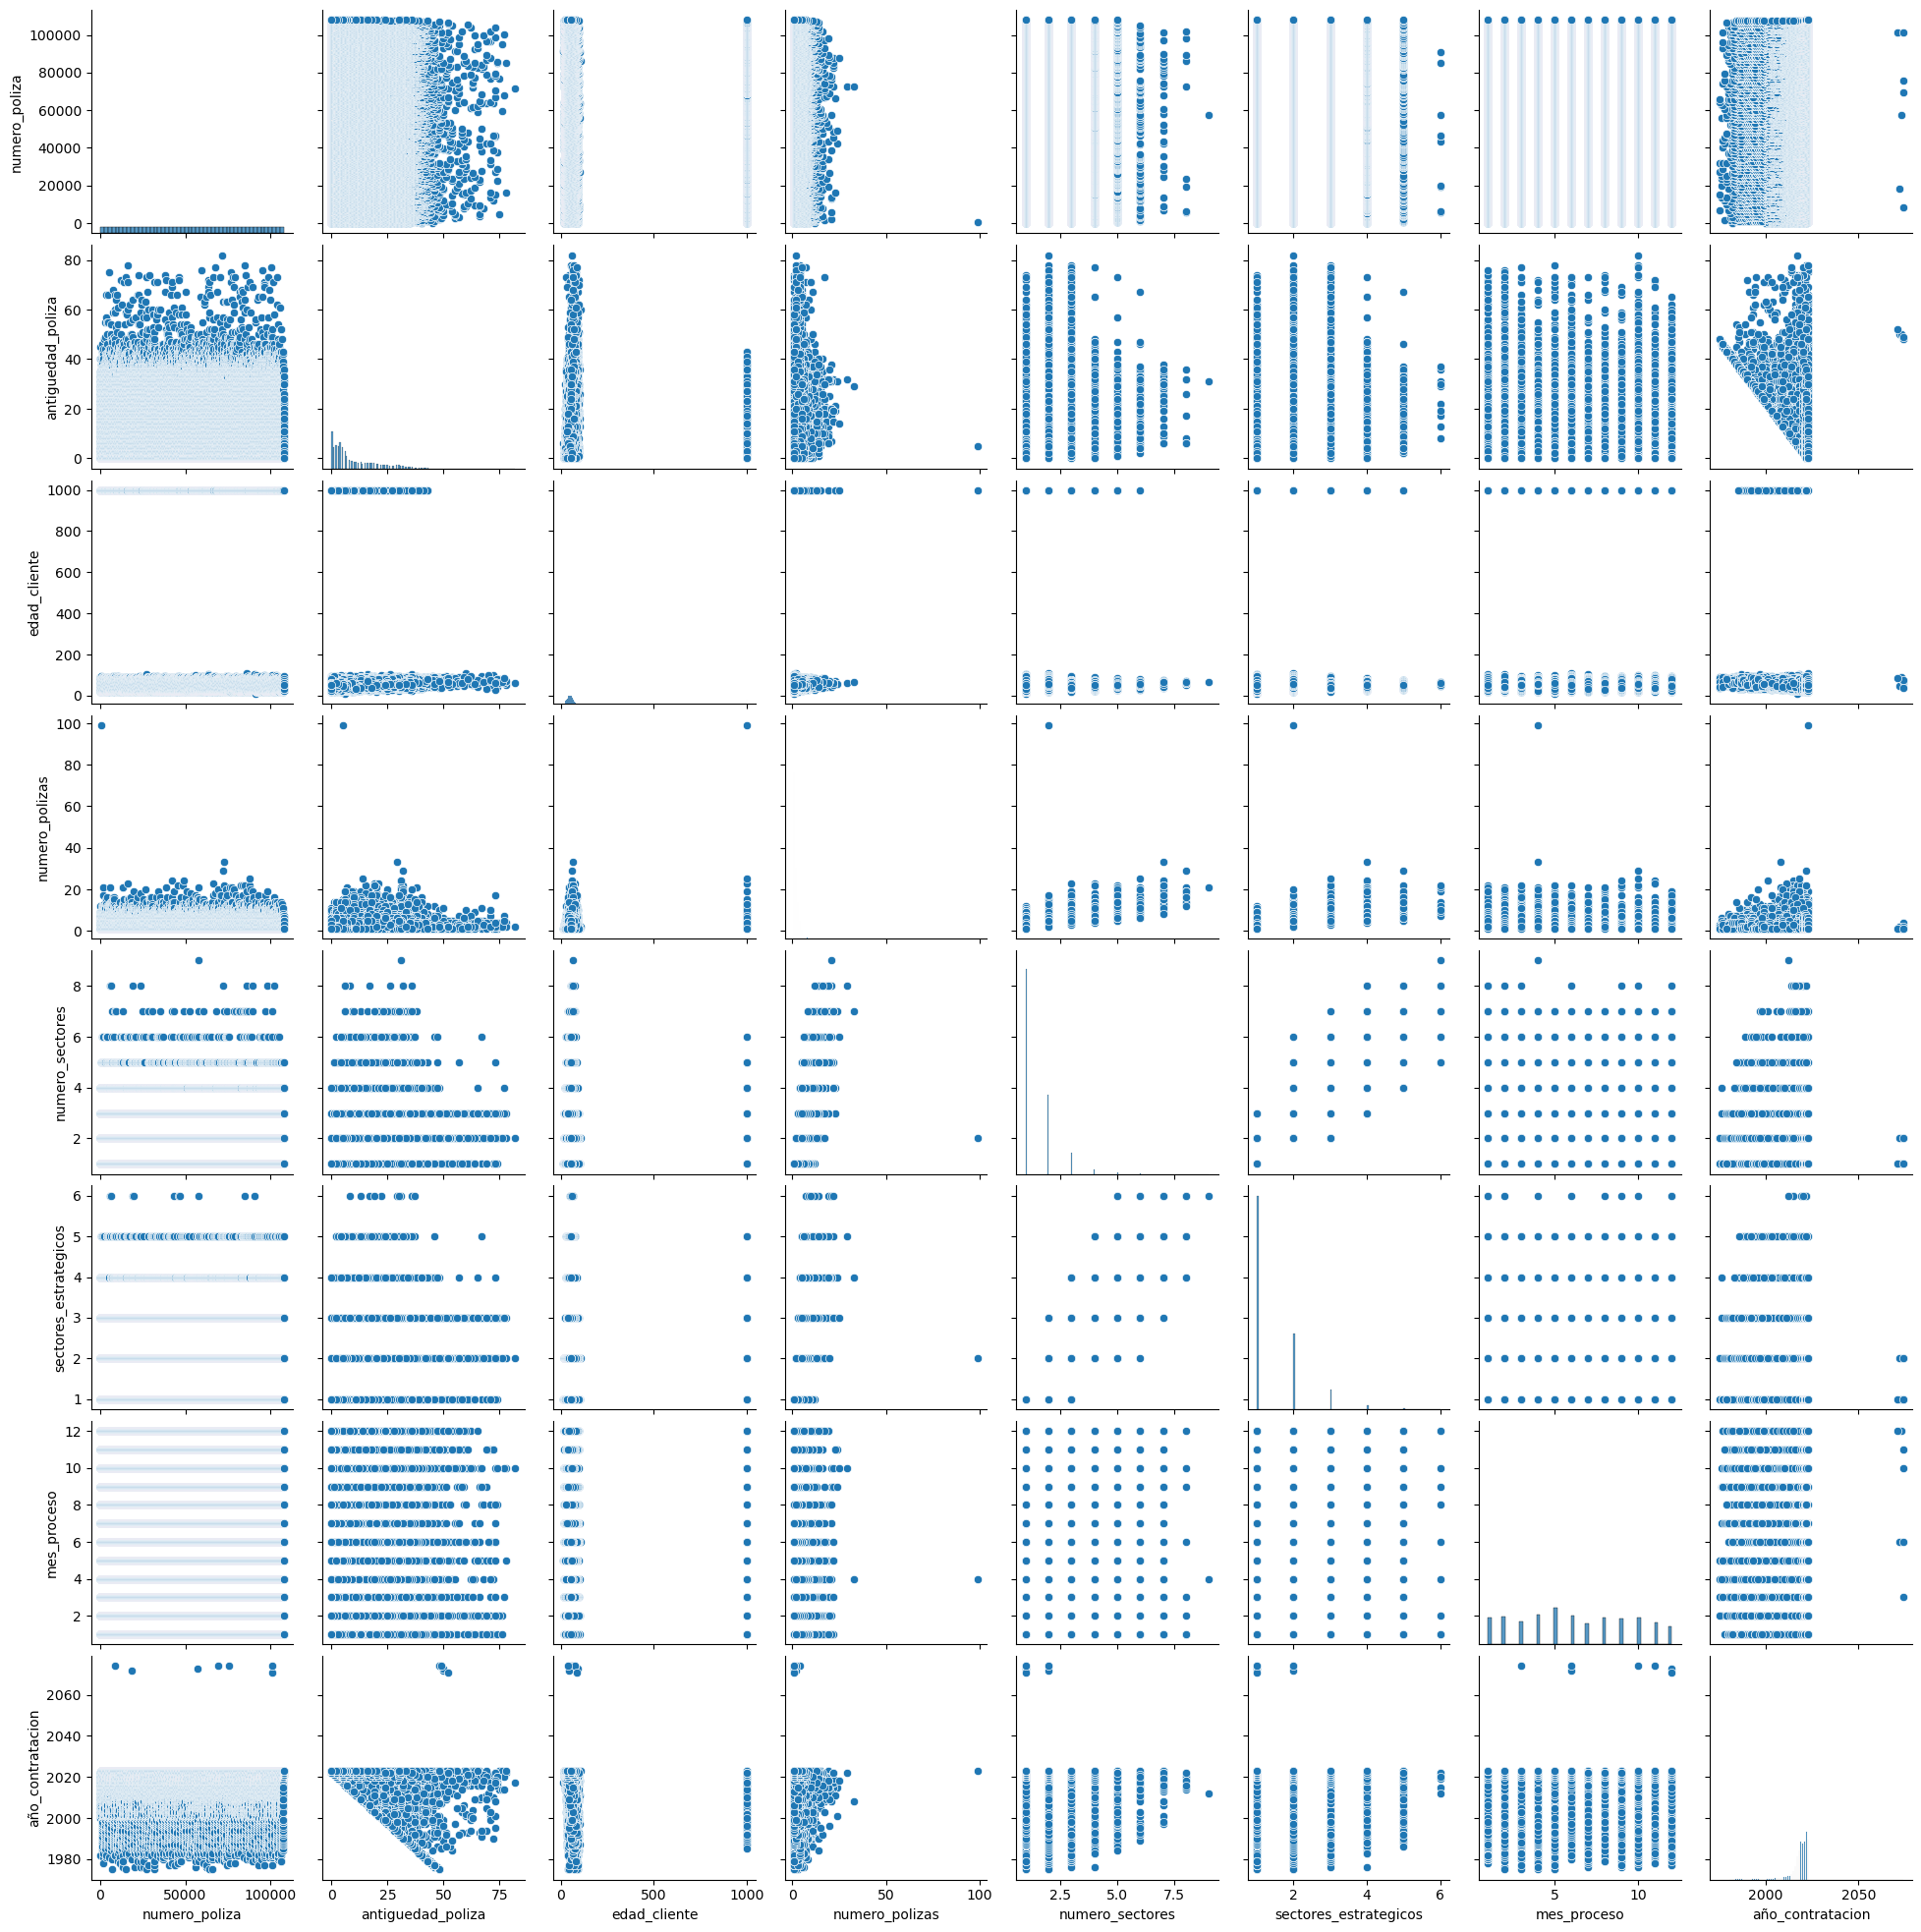

In [31]:
plt.figure(figsize=(35,100))
sns.pairplot(datos_limpios)
plt.show()

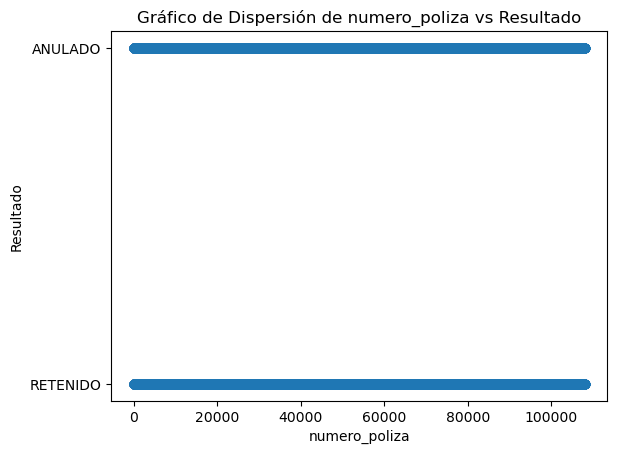

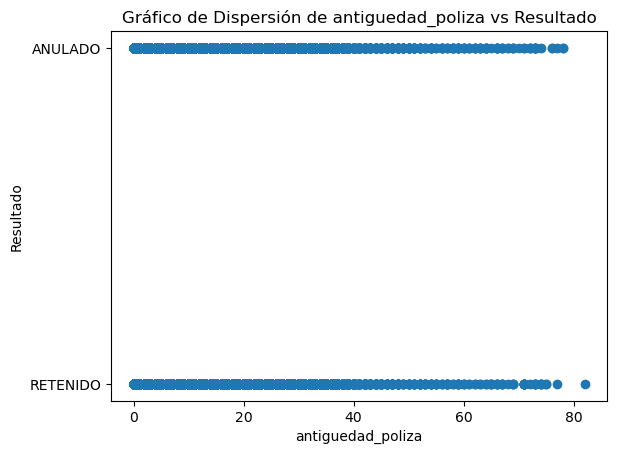

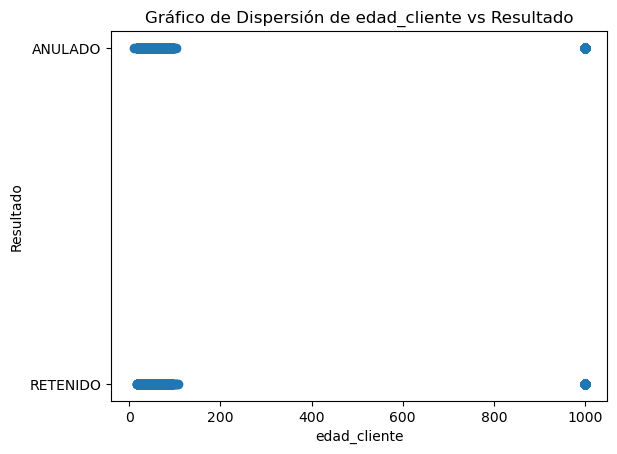

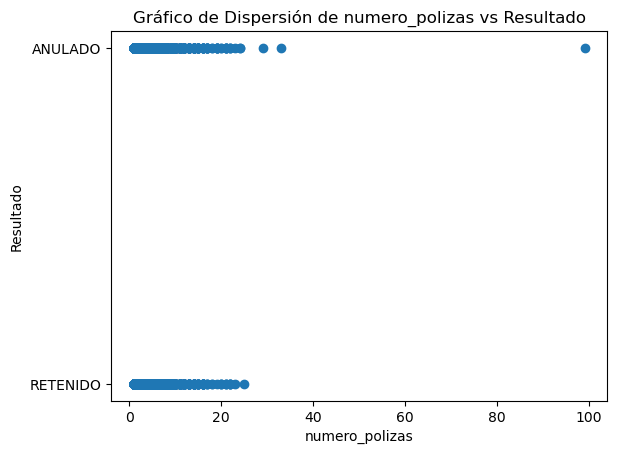

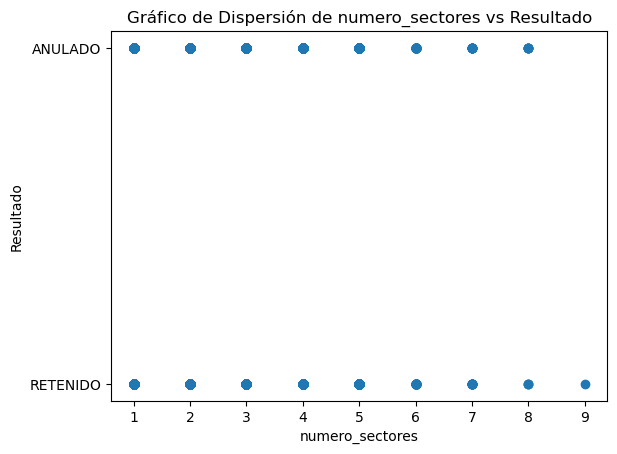

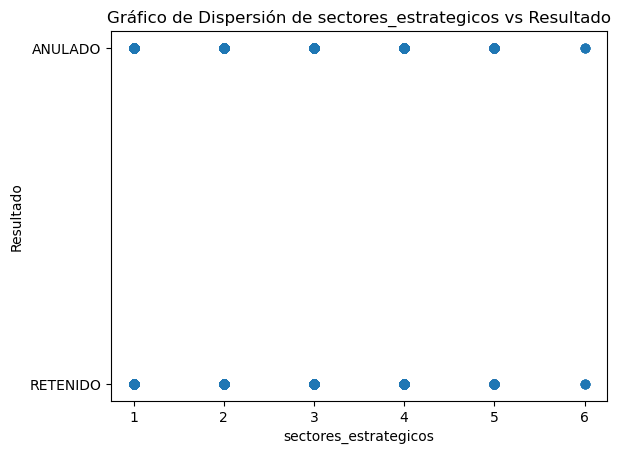

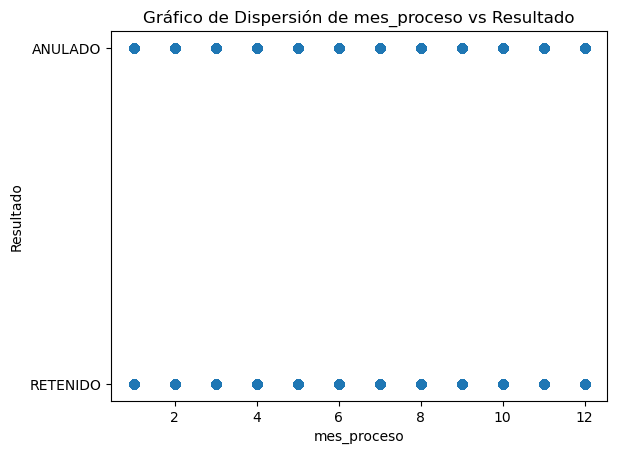

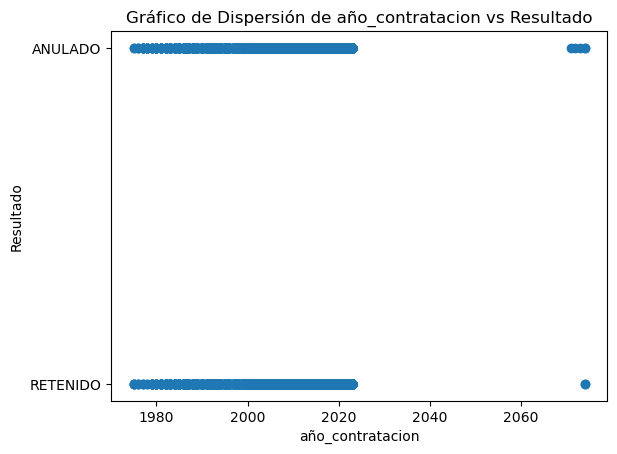

In [32]:
for column in VNumericas:
    plt.scatter(datos_limpios[column], datos_limpios['resultado_retencion'])
    plt.title(f'Gráfico de Dispersión de {column} vs Resultado')
    plt.xlabel(column)
    plt.ylabel('Resultado')
    plt.show()

##### **Diagramas de cajas:**

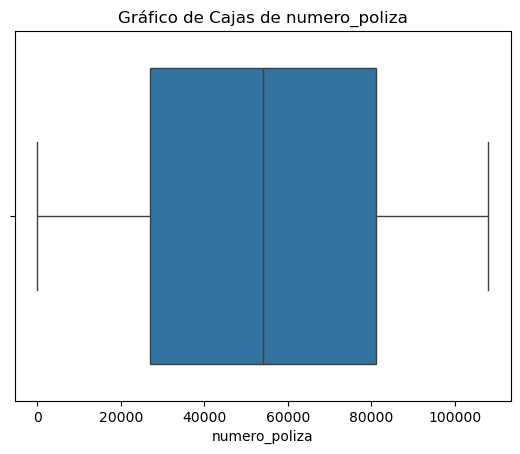

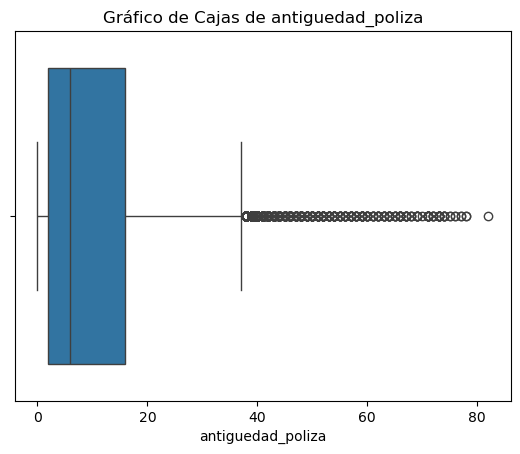

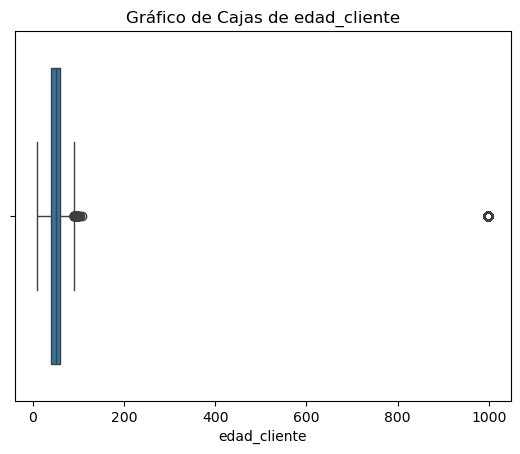

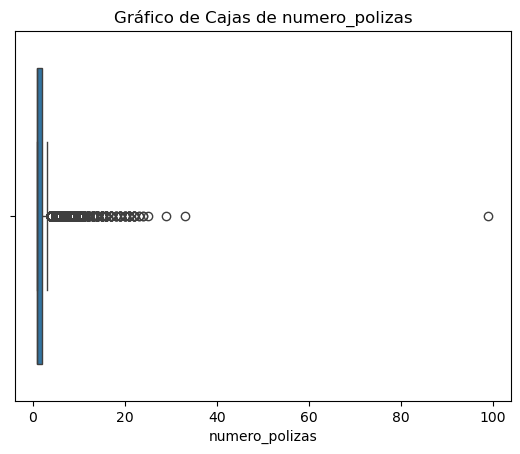

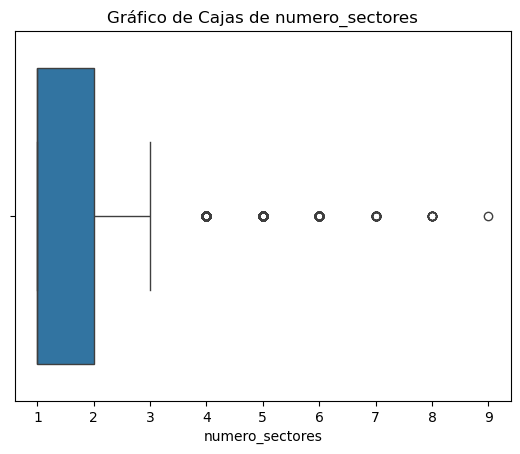

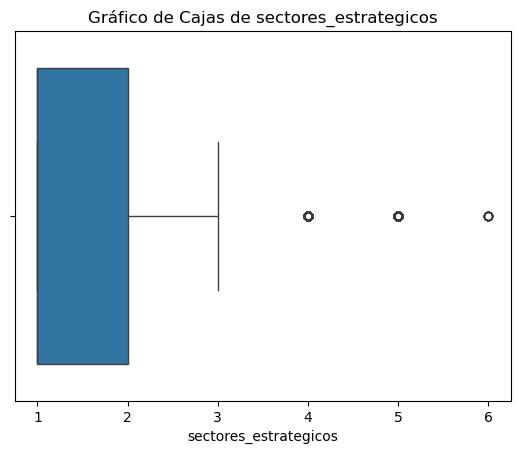

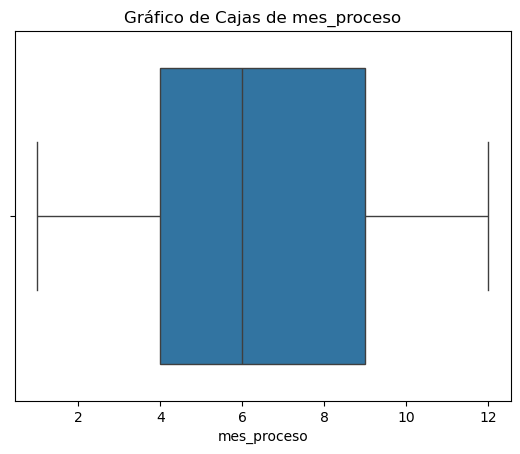

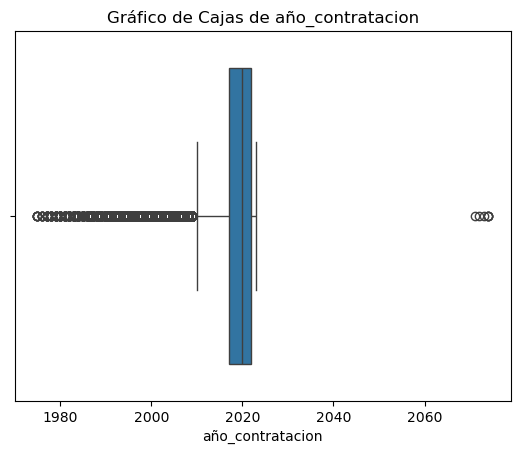

In [33]:
for column in VNumericas:
    sns.boxplot(x=datos_limpios[column])
    plt.title(f'Gráfico de Cajas de {column}')
    plt.xlabel(column)
    plt.show()

#### **Tratamiento de outliers**

**- Número de pólizas:** Volumenes de pólizas muy altos (+99) ->->->-> son pólizas de empresas ✅

**- Año contratacion:** Años mayores del que estamos actualmente (+2024)

**- Edad cliente:** Edades muy elevadas (999) ->->->-> edad 999 asignada a las pólizas de empresas 

**- Antiguedad poliza:** Antigüedad de pólizas muy elevadas (+80) ->->->-> Es posible ceder las pólizas ✅


In [34]:
# Crear nueva columna 'diferencia' que es edad_cliente - antiguedad_poliza
datos_limpios['diferencia'] = datos_limpios['edad_cliente'] - datos_limpios['antiguedad_poliza']

# Filtrar casos donde la diferencia es negativa
negative_difference = datos_limpios[datos_limpios['diferencia'] < 0]

negative_difference.head()
# print(f"Registros con mayor antigüedad que edad: {len(negative_difference)}")

,numero_poliza,producto_comercial,direccion_tecnica,oficina_directa,oficina_delegada,canal_contratacion,forma_contratacion,tipo_productor,forma_pago,canal_cliente,...,edad_cliente,numero_polizas,numero_sectores,tramo_antiguedad,sectores_estrategicos,tipo_valor_cliente,resultado_retencion,mes_proceso,año_contratacion,diferencia
3421,3422,AN,15,3611,3604,RED AGEN,INTERMEDIADO,DELEGADOS,A,1,...,56,2,2,> 7,2.0,3,RETENIDO,2,2019,-1
3577,3578,AI,66,6217,8631,RED AGEN,INTERMEDIADO,DELEGADOS,A,1,...,56,2,2,> 7,2.0,3,ANULADO,3,2019,-10
4203,4204,AN,18,418,418,AUTOMOCION,INTERMEDIADO,ACUERDOS DISTRIBUCION-RCI,A,5,...,47,1,1,> 7,1.0,3,ANULADO,12,2016,-3
4970,4971,AN,18,2313,8332,RED AGEN,INTERMEDIADO,DELEGADOS,A,1,...,35,1,1,> 7,1.0,3,ANULADO,3,2023,-4
4972,4973,AI,33,3911,3914,RED AGEN,INTERMEDIADO,DELEGADOS,A,1,...,42,2,2,> 7,2.0,3,RETENIDO,2,2023,-1


In [35]:
# Filtrar los valores de la columna 'edad' que son mayores que 110
edades_mayores_110 = datos_limpios[datos_limpios['edad_cliente'] > 110]['edad_cliente']

# Usar value_counts para ver la distribución de valores en la columna 'edad' filtrada
distribucion_edades_mayores_110 = edades_mayores_110.value_counts()

# Mostrar la distribución de valores en la columna 'edad' filtrada
print("Distribución de valores en la columna 'edad' mayores que 110:")
print(distribucion_edades_mayores_110)

Distribución de valores en la columna 'edad' mayores que 110:
999    1224
Name: edad_cliente, dtype: int64


In [36]:
# Filtrar los valores de la columna 'año_contratacion' que son mayores que 2024
años_mayores_2024 = datos_limpios[datos_limpios['año_contratacion'] > 2024]['año_contratacion']

# Usar value_counts para ver la distribución de valores en la columna 'edad' filtrada
distribucion_años_mayores_2024 = años_mayores_2024.value_counts()

# Mostrar la distribución de valores en la columna 'edad' filtrada
print("Distribución de valores en la columna 'año_contratacion' mayores que 2024:")
print(distribucion_años_mayores_2024)

Distribución de valores en la columna 'año_contratacion' mayores que 2024:
2074    4
2072    1
2073    1
2071    1
Name: año_contratacion, dtype: int64


In [37]:
# Filtrar y eliminar las filas con año_contratacion mayor que 2024
datos_limpios = datos_limpios[datos_limpios['año_contratacion'] <= 2024]
print('Datos con año de contratacion >= 2024 eliminados')

Datos con año de contratacion >= 2024 eliminados


In [38]:
# Filtrar los valores de la columna 'numero_polizas' que son mayores que 90
polizas_mayores_90 = datos_limpios[datos_limpios['numero_polizas'] > 90]['numero_polizas']

# Usar value_counts para ver la distribución de valores en la columna 'edad' filtrada
distribucion_polizas_mayores_90 = polizas_mayores_90.value_counts()

# Mostrar la distribución de valores en la columna 'edad' filtrada
print("Distribución de valores en la columna 'numero_polizas' mayores que 90:")
print(distribucion_polizas_mayores_90)

Distribución de valores en la columna 'numero_polizas' mayores que 90:
99    1
Name: numero_polizas, dtype: int64


In [39]:
# Eliminar las filas que tienen 99 polizas
datos_limpios = datos_limpios[datos_limpios['numero_polizas'] != 99]
print('Datos con 99 pólizas eliminados')

Datos con 99 pólizas eliminados


 ### 📊 **Gráficas y visualizaciones:**

 ##### **Distribución del resultado de retención en variables numéricas**

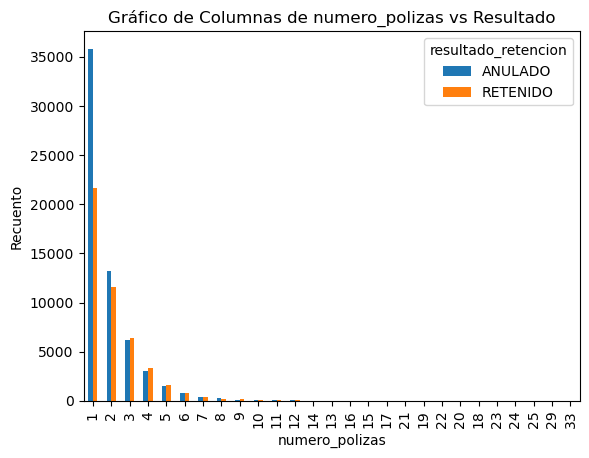

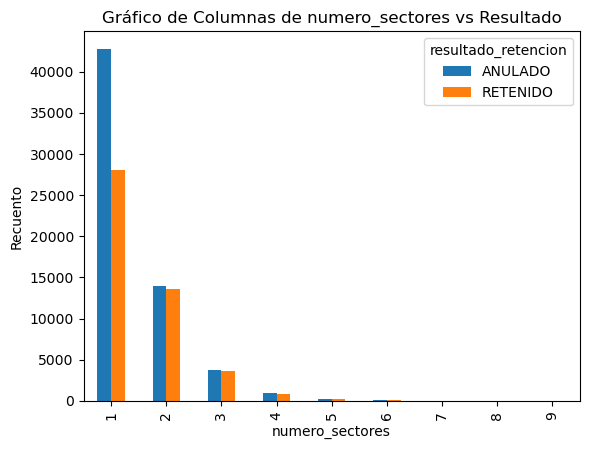

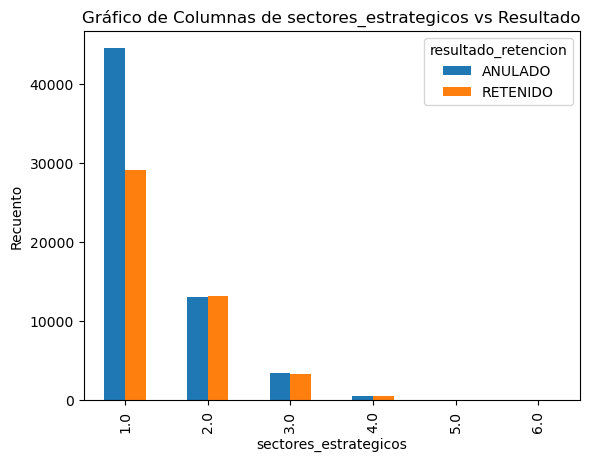

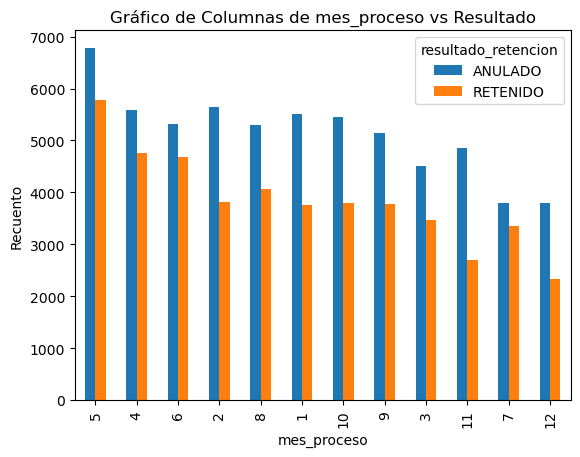

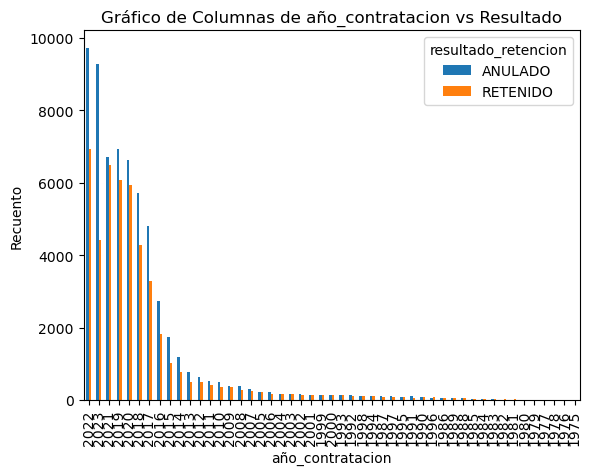

In [40]:
for column in VNumericas:
    if datos_limpios[column].nunique() <= 50:  # Umbral de 50 valores únicos
        counts = datos_limpios.groupby([column, 'resultado_retencion']).size().unstack(fill_value=0)
        counts['total'] = counts.sum(axis=1)
        counts = counts.sort_values(by='total', ascending=False).drop(columns='total')
        counts.plot(kind='bar', stacked=False)
        plt.title(f'Gráfico de Columnas de {column} vs Resultado')
        plt.xlabel(column)
        plt.ylabel('Recuento')
        plt.show()

 ##### **Distribución del resultado de retención en variables categóricas**

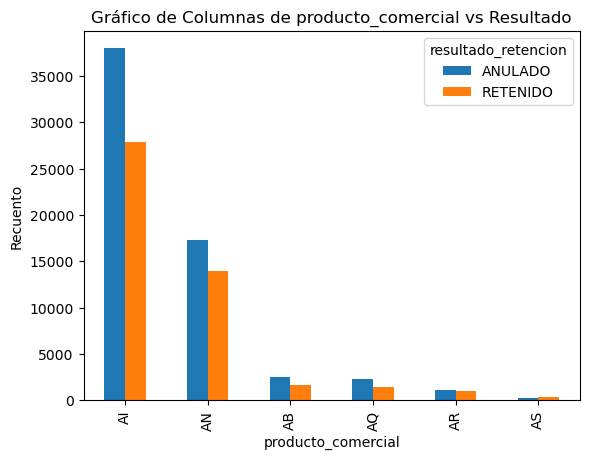

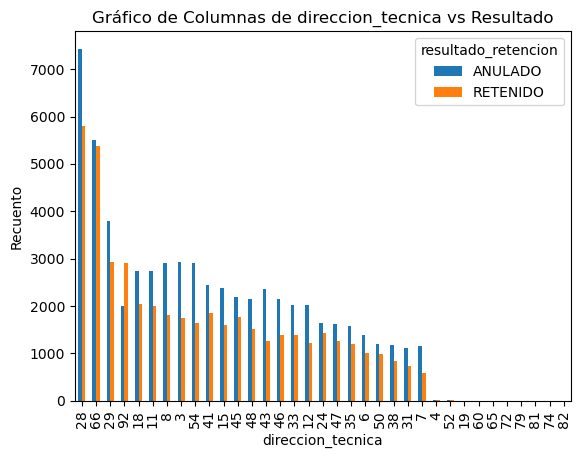

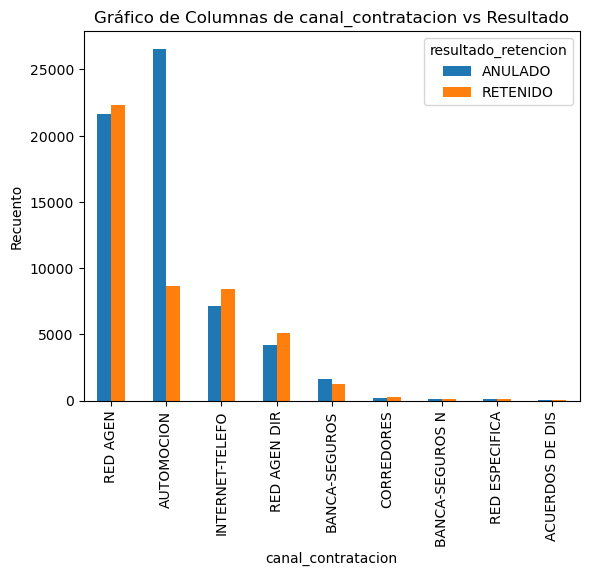

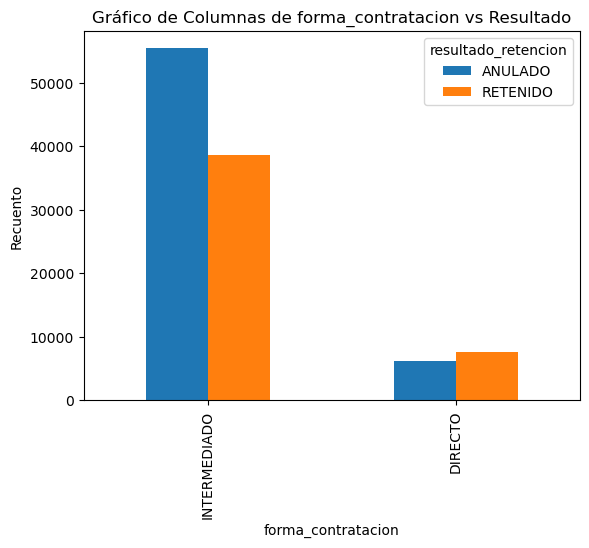

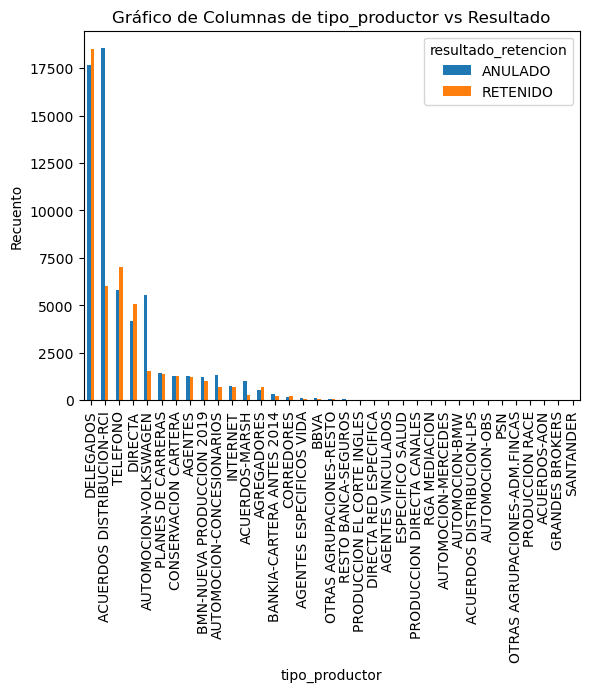

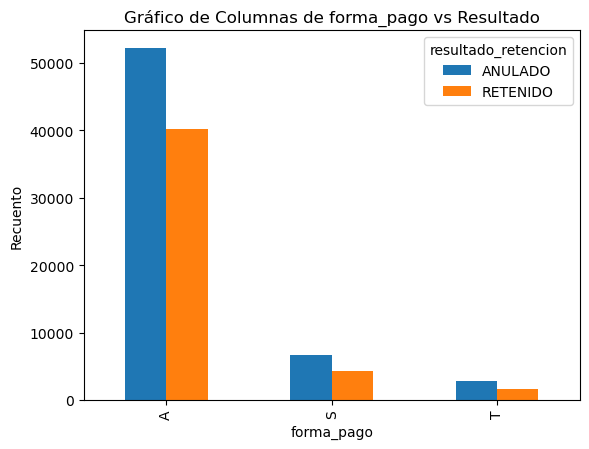

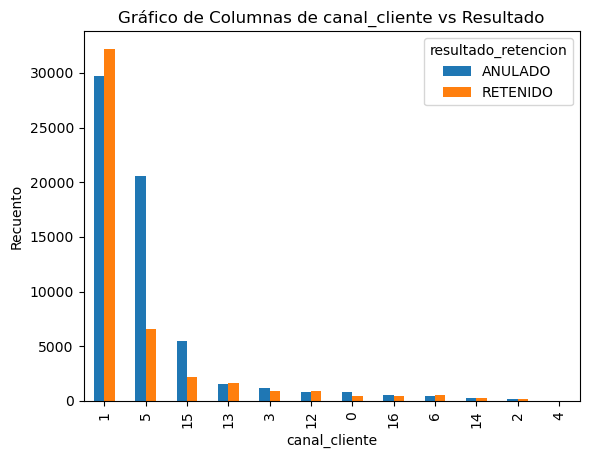

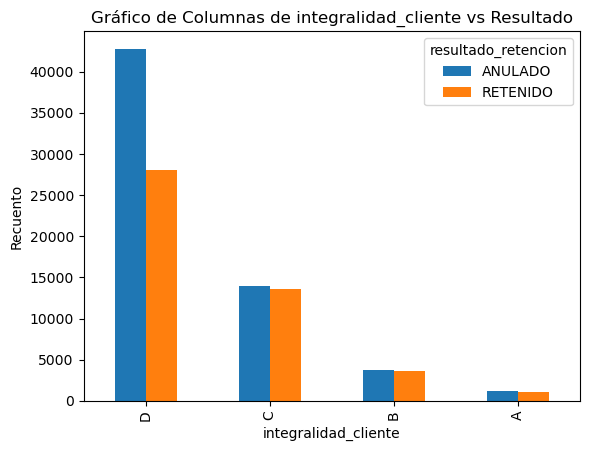

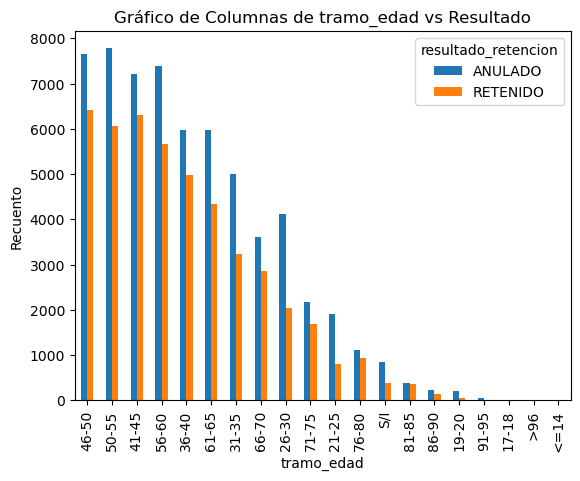

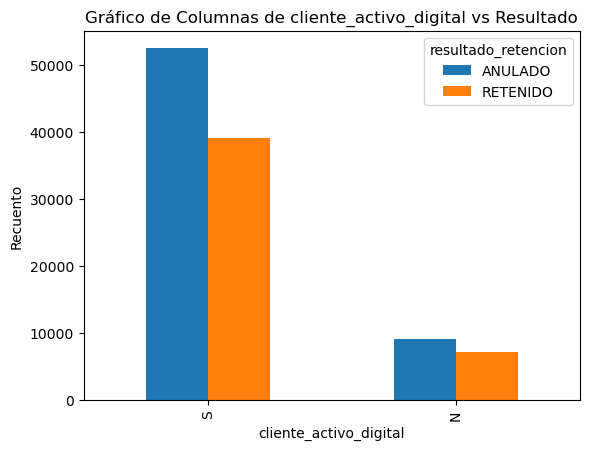

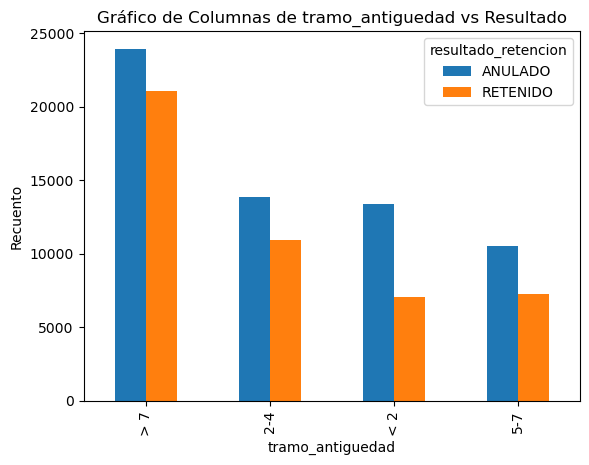

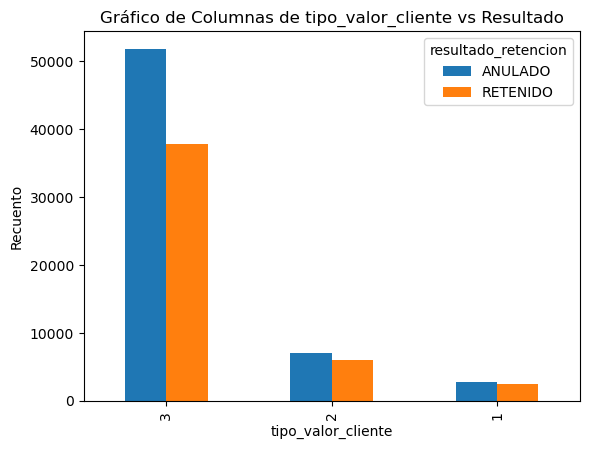

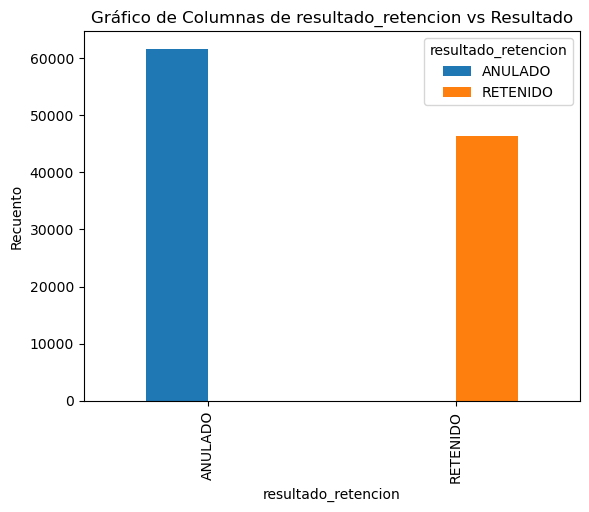

In [41]:
for column in VCategoricas:
    if column in datos_limpios.columns:
        if datos_limpios[column].nunique() <= 80:  # Umbral de 80 valores únicos
            counts = datos_limpios.groupby([column, 'resultado_retencion']).size().unstack(fill_value=0)
            counts['total'] = counts.sum(axis=1)
            counts = counts.sort_values(by='total', ascending=False).drop(columns='total')
            counts.plot(kind='bar', stacked=False)
            plt.title(f'Gráfico de Columnas de {column} vs Resultado')
            plt.xlabel(column)
            plt.ylabel('Recuento')
            plt.show()

##### **Eliminar columnas que no aportan:**

In [42]:
# Columnas a eliminar
columnas_a_eliminar = ['numero_poliza', 'numero_sectores']

# Verificar si las columnas existen en el DataFrame y eliminarlas
columnas_existentes = [col for col in columnas_a_eliminar if col in datos_limpios.columns]
columnas_no_encontradas = [col for col in columnas_a_eliminar if col not in datos_limpios.columns]

if columnas_existentes:
    datos_limpios = datos_limpios.drop(columns=columnas_existentes)
    print(f"Columnas eliminadas correctamente: {', '.join(columnas_existentes)}")
if columnas_no_encontradas:
    print(f"Columnas no encontradas: {', '.join(columnas_no_encontradas)}")

print("Columnas después de eliminar numero_poliza y numero_sectores:")
datos_limpios.columns

Columnas eliminadas correctamente: numero_poliza, numero_sectores
Columnas después de eliminar numero_poliza y numero_sectores:


Index(['producto_comercial', 'direccion_tecnica', 'oficina_directa',
       'oficina_delegada', 'canal_contratacion', 'forma_contratacion',
       'tipo_productor', 'forma_pago', 'canal_cliente', 'sectores_contratados',
       'integralidad_cliente', 'tramo_edad', 'cliente_activo_digital',
       'antiguedad_poliza', 'edad_cliente', 'numero_polizas',
       'tramo_antiguedad', 'sectores_estrategicos', 'tipo_valor_cliente',
       'resultado_retencion', 'mes_proceso', 'año_contratacion', 'diferencia'],
      dtype='object')

In [43]:
# Eliminar las columnas 'tramo_edad', 'tramo_antiguedad' y 'año_contratacion'
datos_limpios.drop(columns=['tramo_edad', 'tramo_antiguedad','año_contratacion'], inplace=True)

##### **Cambios en los intervalos de las variables tras observar su distribución de retenidos en las visualizaciones**

In [44]:
# Definir los intervalos y las etiquetas para los tramos de edad
intervalos = [18, 30, 80, float('inf')]
etiquetas = ['18-30', '31-80', '>80']

# Crear la columna 'tramo_edad' utilizando pd.cut
datos_limpios['tramo_edad'] = pd.cut(datos_limpios['edad_cliente'], bins=intervalos, labels=etiquetas, right=False)


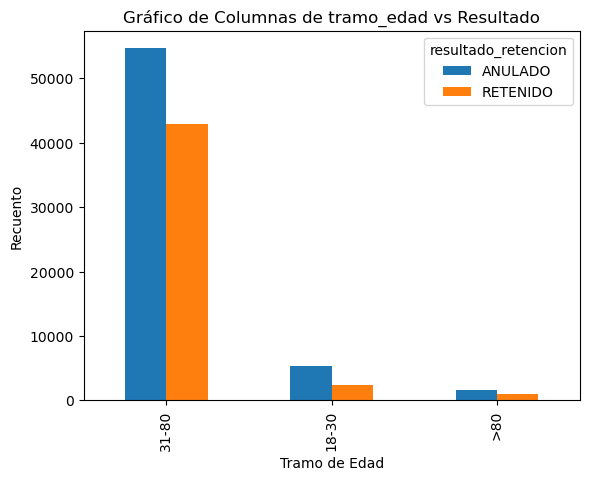

In [45]:
# Graficar la distribución de valores en la columna 'tramo_edad'
counts_tramo_edad = datos_limpios.groupby(['tramo_edad', 'resultado_retencion']).size().unstack(fill_value=0)
counts_tramo_edad['total'] = counts_tramo_edad.sum(axis=1)
counts_tramo_edad = counts_tramo_edad.sort_values(by='total', ascending=False).drop(columns='total')
counts_tramo_edad.plot(kind='bar', stacked=False)
plt.title('Gráfico de Columnas de tramo_edad vs Resultado')
plt.xlabel('Tramo de Edad')
plt.ylabel('Recuento')
plt.show()

In [46]:
# Definir los intervalos y las etiquetas para los tramos de antigüedad
intervalos_antiguedad = [0, 1, 30, 48, float('inf')]
etiquetas_antiguedad = ['<1', '1-30', '31-48', '>49']

# Crear la columna 'tramo_antiguedad' utilizando pd.cut
datos_limpios['tramo_antiguedad'] = pd.cut(datos_limpios['antiguedad_poliza'], bins=intervalos_antiguedad, labels=etiquetas_antiguedad, right=False)

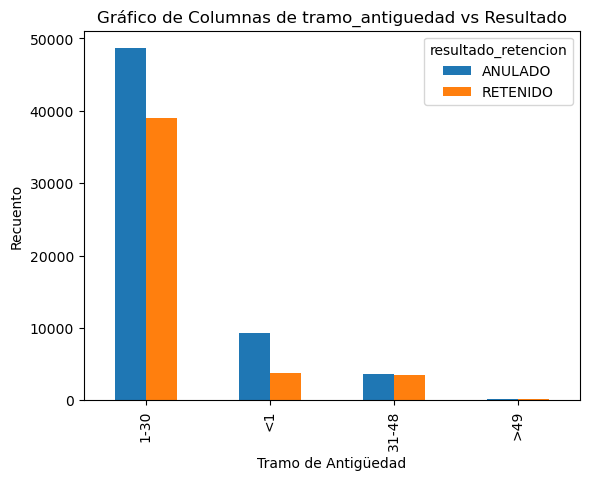

In [47]:
# Graficar la distribución de valores en la columna 'tramo_antiguedad'
counts_tramo_antiguedad = datos_limpios.groupby(['tramo_antiguedad', 'resultado_retencion']).size().unstack(fill_value=0)
counts_tramo_antiguedad['total'] = counts_tramo_antiguedad.sum(axis=1)
counts_tramo_antiguedad = counts_tramo_antiguedad.sort_values(by='total', ascending=False).drop(columns='total')
counts_tramo_antiguedad.plot(kind='bar', stacked=False)
plt.title('Gráfico de Columnas de tramo_antiguedad vs Resultado')
plt.xlabel('Tramo de Antigüedad')
plt.ylabel('Recuento')
plt.show()

In [48]:
# Definir los intervalos y las etiquetas para los tramos de numero_polizas
intervalos_polizas = [0, 1, 2, 3, 4, 5, float('inf')]
etiquetas_polizas = ['0', '1', '2', '3', '4', '+5']

# Crear la columna 'tramo_numero_polizas' utilizando pd.cut
datos_limpios['tramo_numero_polizas'] = pd.cut(datos_limpios['numero_polizas'], bins=intervalos_polizas, labels=etiquetas_polizas, right=False)

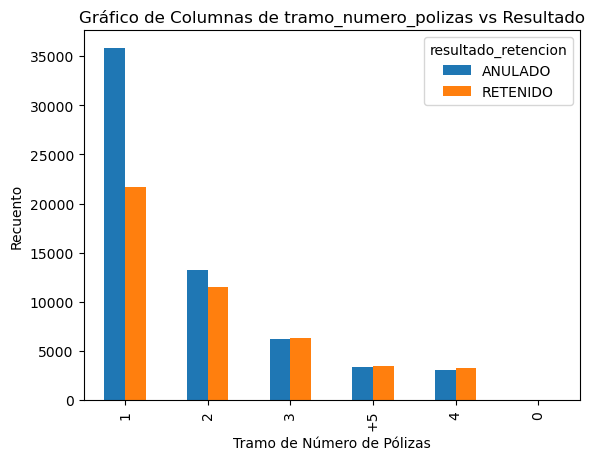

In [49]:
# Graficar la distribución de valores en la columna 'tramo_numero_polizas'
counts_tramo_numero_polizas = datos_limpios.groupby(['tramo_numero_polizas', 'resultado_retencion']).size().unstack(fill_value=0)
counts_tramo_numero_polizas['total'] = counts_tramo_numero_polizas.sum(axis=1)
counts_tramo_numero_polizas = counts_tramo_numero_polizas.sort_values(by='total', ascending=False).drop(columns='total')
counts_tramo_numero_polizas.plot(kind='bar', stacked=False)
plt.title('Gráfico de Columnas de tramo_numero_polizas vs Resultado')
plt.xlabel('Tramo de Número de Pólizas')
plt.ylabel('Recuento')
plt.show()

In [50]:
# Función para agrupar los valores de canal_contratacion
def agrupar_canal(canal_agrupacion):
    if canal_agrupacion in ['RED AGEN', 'RED AGEN DIR', 'RED ESPECIFICA']:
        return 'RED'
    elif canal_agrupacion in ['BANCA-SEGUROS', 'BANCA-SEGUROS N']:
        return 'BANCA-SEGUROS'
    elif canal_agrupacion == 'AUTOMOCION':
        return 'AUTOMOCION'
    else:
        return 'OTROS CANALES'

# Aplicar la función de agrupación a la columna canal_contratacion
datos_limpios['canal_contratacion_agrupado'] = datos_limpios['canal_contratacion'].apply(agrupar_canal)

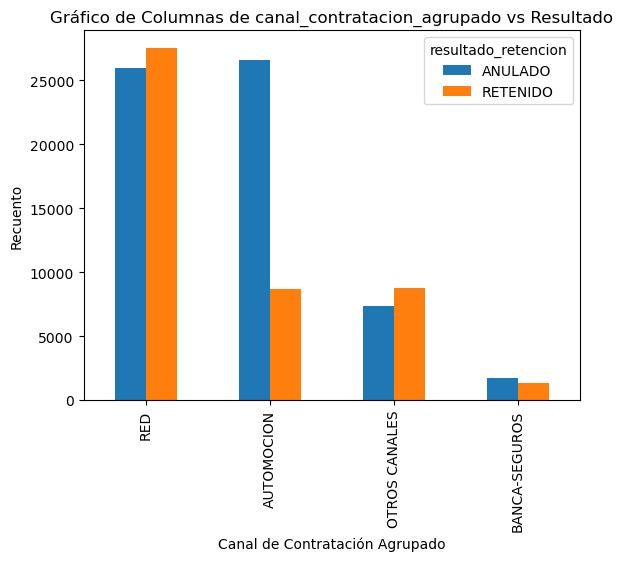

In [51]:
# Graficar la distribución de valores en la columna 'canal_contratacion_agrupado'
counts_canal_contratacion_agrupado = datos_limpios.groupby(['canal_contratacion_agrupado', 'resultado_retencion']).size().unstack(fill_value=0)
counts_canal_contratacion_agrupado['total'] = counts_canal_contratacion_agrupado.sum(axis=1)
counts_canal_contratacion_agrupado = counts_canal_contratacion_agrupado.sort_values(by='total', ascending=False).drop(columns='total')
counts_canal_contratacion_agrupado.plot(kind='bar', stacked=False)
plt.title('Gráfico de Columnas de canal_contratacion_agrupado vs Resultado')
plt.xlabel('Canal de Contratación Agrupado')
plt.ylabel('Recuento')
plt.show()

In [52]:
# Definir Dirección General Territorial para eliminar despues direccion tecnica, oficina directa y oficina delegada que tienen muchos valores
def agrupar_dgt(direccion_tecnica):
    if direccion_tecnica in [4, 28, 52,66,72]:
        return 'MADRID'
    elif direccion_tecnica in [7, 8,19,43,54,73]:
        return 'CATALUÑA-BALEARES'
    elif direccion_tecnica in [6,11,41,75]:
        return 'SUROESTE'
    elif direccion_tecnica in [31,48,50,78]:
        return 'NORTE'
    elif direccion_tecnica in [3,12,46,65,79]:
        return 'ESTE'
    elif direccion_tecnica in [15,33,81]:
        return 'NOROESTE'
    elif direccion_tecnica in [24,45,47,82]:
        return 'CENTRO'
    elif direccion_tecnica in [18,29,74]:
        return 'SUR'
    elif direccion_tecnica in [35,38,94]:
        return 'CANARIAS'
    elif direccion_tecnica in [51]:
        return 'INTERNACIONAL'
    elif direccion_tecnica in [92]:
        return 'CENTRAL'
    else:
        return 'OTROS'

# Aplicar la función de agrupación a la columna direccion_tecnica
datos_limpios['dgt_agrupado'] = datos_limpios['direccion_tecnica'].apply(agrupar_dgt)

In [53]:
# Eliminar las columnas 'edad_cliente', 'antiguedad_poliza', 'canal_contratacion', 'numero_polizas','diferencia', 'direccion_tecnica','oficina_directa','oficina_delegada'
datos_limpios.drop(columns=['edad_cliente', 'antiguedad_poliza', 'canal_contratacion', 'numero_polizas','diferencia','direccion_tecnica','oficina_directa','oficina_delegada'], inplace=True)

In [54]:
datos_limpios.head()

,producto_comercial,forma_contratacion,tipo_productor,forma_pago,canal_cliente,sectores_contratados,integralidad_cliente,cliente_activo_digital,sectores_estrategicos,tipo_valor_cliente,resultado_retencion,mes_proceso,tramo_edad,tramo_antiguedad,tramo_numero_polizas,canal_contratacion_agrupado,dgt_agrupado
0,AI,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,RETENIDO,8,31-80,1-30,2,RED,CATALUÑA-BALEARES
1,AI,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,ANULADO,9,31-80,1-30,2,RED,NOROESTE
2,AI,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,RETENIDO,6,31-80,31-48,3,RED,NOROESTE
3,AN,INTERMEDIADO,AGENTES,A,1,AP,C,S,2.0,3,RETENIDO,11,31-80,1-30,3,RED,SUROESTE
4,AI,INTERMEDIADO,DELEGADOS,A,1,A,D,S,1.0,3,ANULADO,10,31-80,1-30,1,RED,MADRID


##### **Identificar de nuevo las VCategoricas y VNumericas tras los cambios:**

In [55]:
# Identificar las columnas categóricas y numéricas
VCategoricas = [col for col in datos_limpios.columns if datos_limpios[col].dtype in ['object', 'category']]
VNumericas = [col for col in datos_limpios.columns if datos_limpios[col].dtype in ['int64', 'float64']]

# Mostrar las columnas categóricas y numéricas
print("Columnas categóricas:")
print(VCategoricas)

print("\nColumnas numéricas:")
print(VNumericas)

# Verificar las columnas faltantes
todas_columnas = set(datos_limpios.columns)
columnas_identificadas = set(VCategoricas + VNumericas)
columnas_faltantes = todas_columnas - columnas_identificadas

print("\nColumnas faltantes:")
print(columnas_faltantes)

# Mostrar tipos de datos de las columnas faltantes
print("\nTipos de datos de las columnas faltantes:")
for col in columnas_faltantes:
    print(f"{col}: {datos_limpios[col].dtype}")

Columnas categóricas:
['producto_comercial', 'forma_contratacion', 'tipo_productor', 'forma_pago', 'canal_cliente', 'sectores_contratados', 'integralidad_cliente', 'cliente_activo_digital', 'tipo_valor_cliente', 'resultado_retencion', 'tramo_edad', 'tramo_antiguedad', 'tramo_numero_polizas', 'canal_contratacion_agrupado', 'dgt_agrupado']

Columnas numéricas:
['sectores_estrategicos', 'mes_proceso']

Columnas faltantes:
set()

Tipos de datos de las columnas faltantes:


##### **Distribución en % del resultado de retención en variables numéricas**

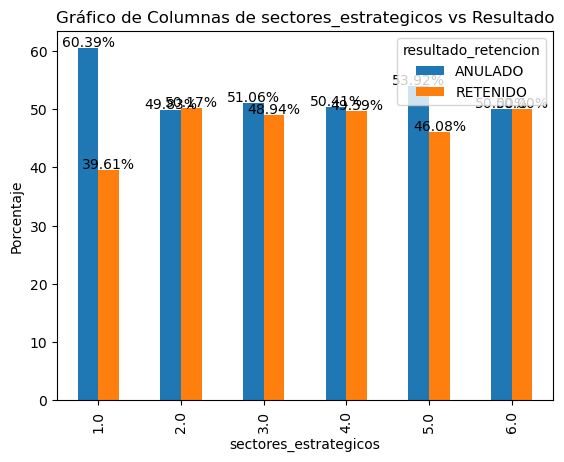

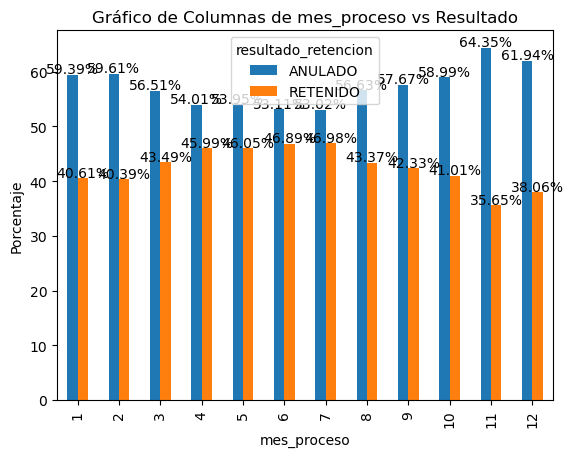

In [56]:
# Graficar la distribución de valores en las columnas numéricas en porcentaje
for column in VNumericas:
    if datos_limpios[column].nunique() <= 50:  # Umbral de 50 valores únicos
        counts = datos_limpios.groupby([column, 'resultado_retencion']).size().unstack(fill_value=0)
        counts_percentage = counts.div(counts.sum(axis=1), axis=0) * 100
        
        ax = counts_percentage.plot(kind='bar', stacked=False)
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height * 1.005), ha='center')
        
        plt.title(f'Gráfico de Columnas de {column} vs Resultado')
        plt.xlabel(column)
        plt.ylabel('Porcentaje')
        plt.show()

##### **Distribución en % del resultado de retención en variables categóricas**

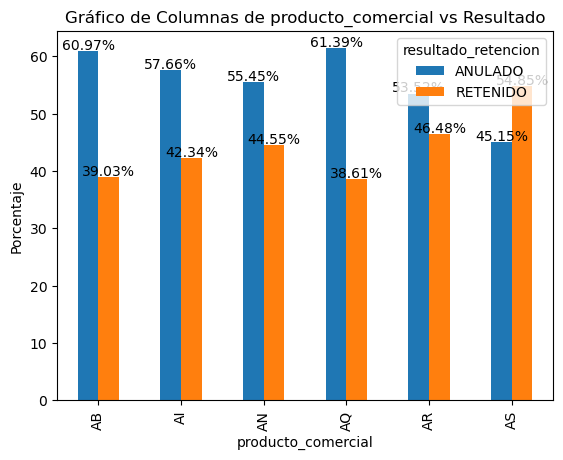

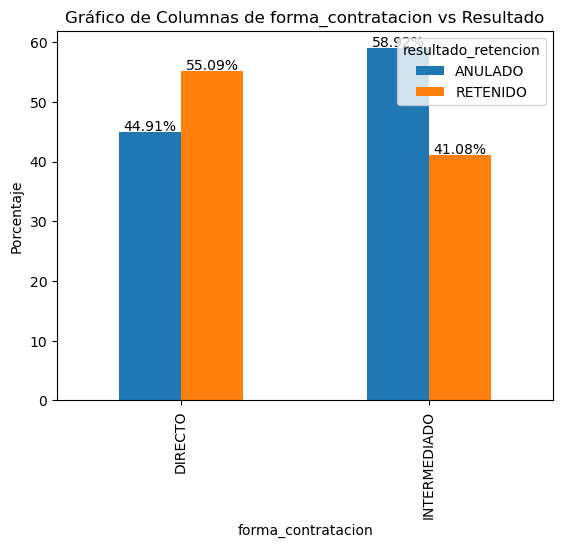

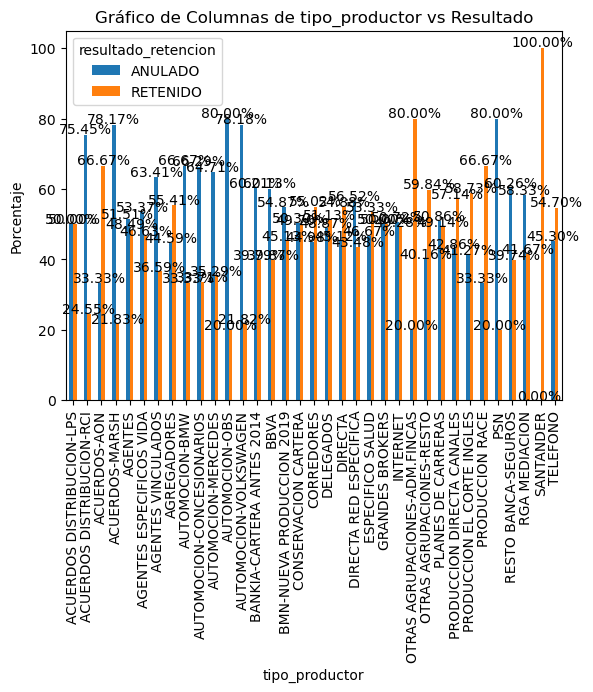

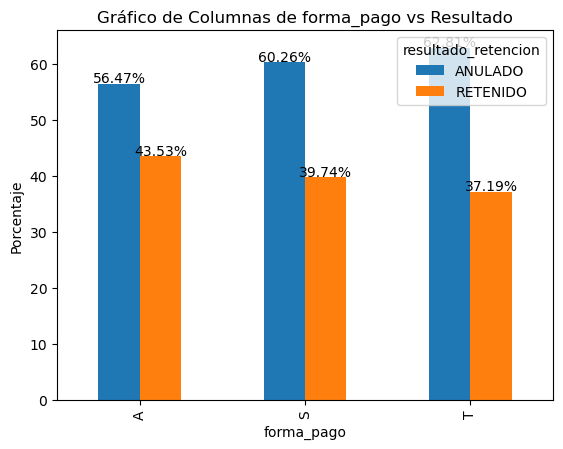

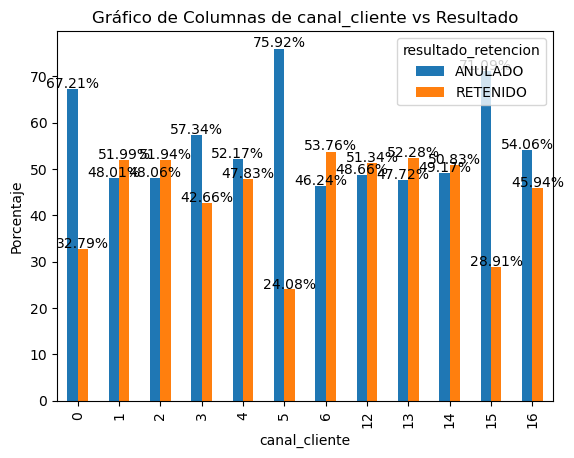

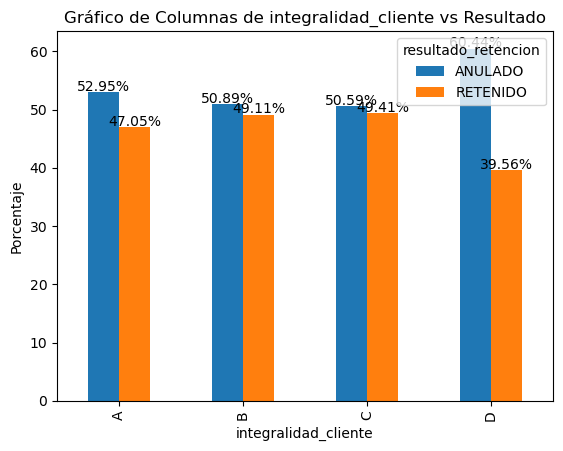

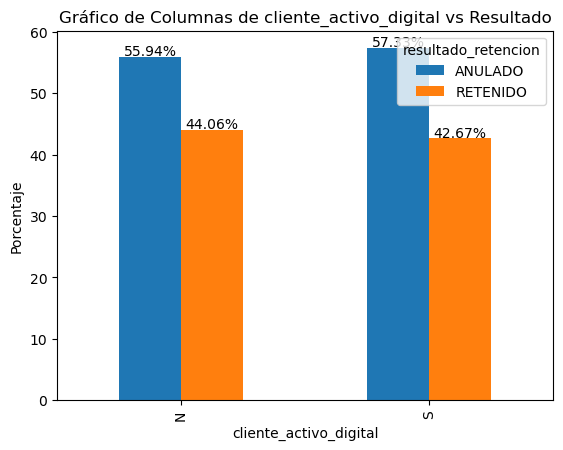

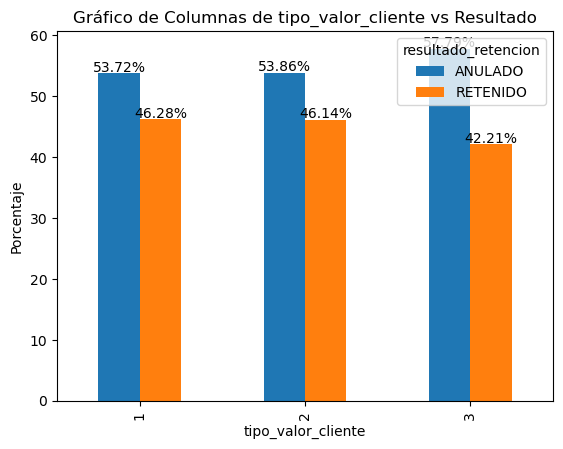

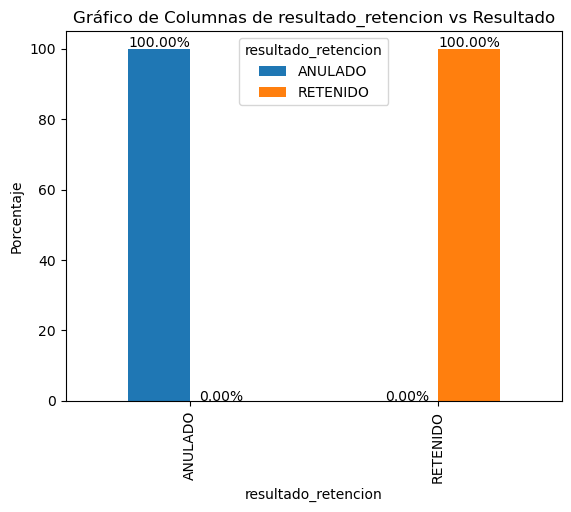

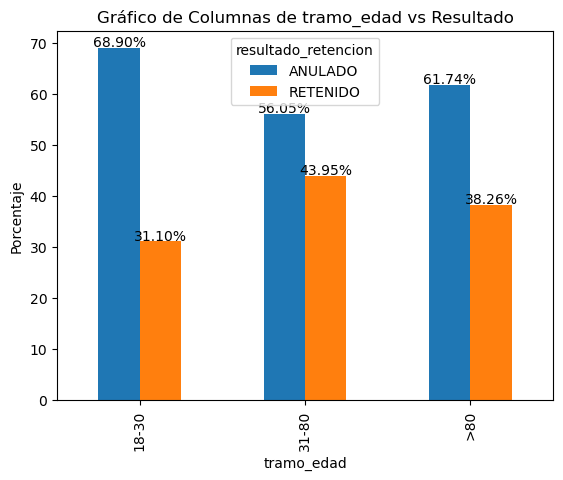

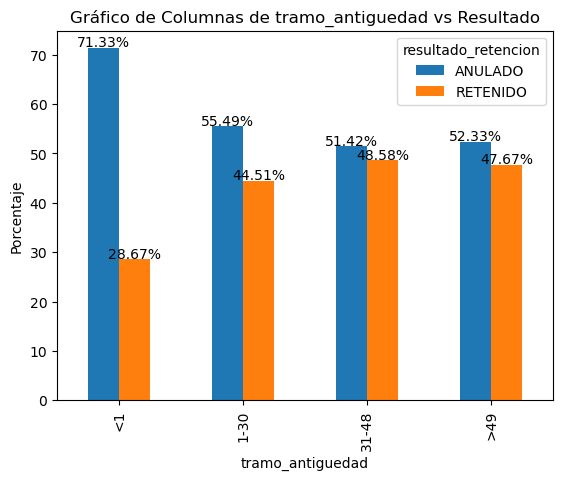

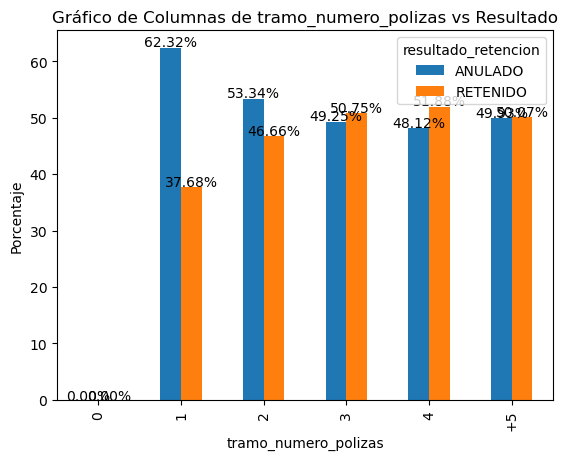

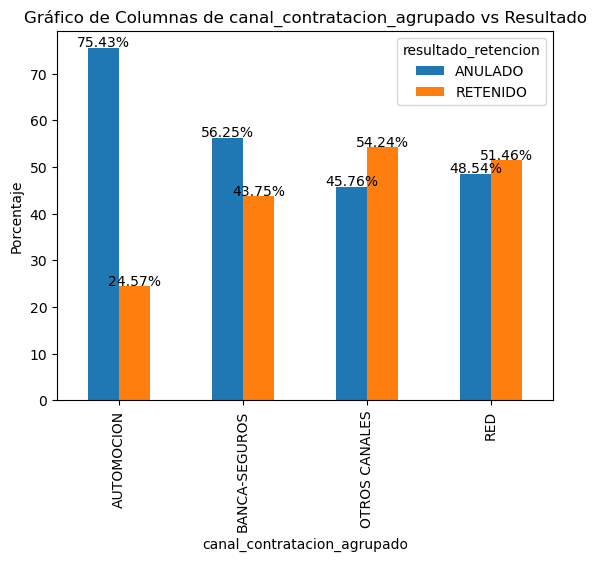

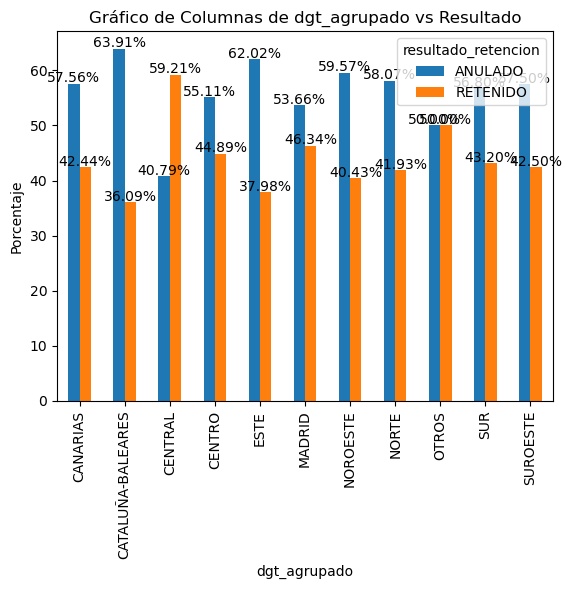

In [57]:
# Graficar la distribución de valores en las columnas categóricas en porcentaje
for column in VCategoricas:
    if column in datos_limpios.columns:
        if datos_limpios[column].nunique() <= 80:  # Umbral de 80 valores únicos
            counts = datos_limpios.groupby([column, 'resultado_retencion']).size().unstack(fill_value=0)
            counts_percentage = counts.div(counts.sum(axis=1), axis=0) * 100
            
            ax = counts_percentage.plot(kind='bar', stacked=False)
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height * 1.005), ha='center')
            
            plt.title(f'Gráfico de Columnas de {column} vs Resultado')
            plt.xlabel(column)
            plt.ylabel('Porcentaje')
            plt.show()

##### **Mapa de calor:**

In [58]:
# # Convertir todas las variables categóricas a códigos numéricos
# for column in VCategoricas:
#     datos_limpios[column] = datos_limpios[column].astype('category').cat.codes

# # Calcular la matriz de correlación
# correlation_matrix = datos_limpios.corr()

# # Crear un mapa de calor para visualizar la matriz de correlación
# plt.figure(figsize=(30, 30))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Mapa de Calor de Correlación entre Variables')
# plt.show()

### ✅**Comprobación y orden de datos:**

In [59]:
datos_limpios.columns

Index(['producto_comercial', 'forma_contratacion', 'tipo_productor',
       'forma_pago', 'canal_cliente', 'sectores_contratados',
       'integralidad_cliente', 'cliente_activo_digital',
       'sectores_estrategicos', 'tipo_valor_cliente', 'resultado_retencion',
       'mes_proceso', 'tramo_edad', 'tramo_antiguedad', 'tramo_numero_polizas',
       'canal_contratacion_agrupado', 'dgt_agrupado'],
      dtype='object')

In [60]:
# Especificar el nuevo orden de las columnas, con 'resultado_retencion' al final
nuevo_orden_columnas = ['producto_comercial','dgt_agrupado',
       'forma_contratacion', 'tipo_productor', 'forma_pago', 'canal_cliente',
       'sectores_contratados', 'integralidad_cliente',
       'cliente_activo_digital', 'sectores_estrategicos',
       'tipo_valor_cliente', 'mes_proceso',
       'tramo_edad', 'tramo_antiguedad', 'tramo_numero_polizas',
       'canal_contratacion_agrupado' ,'resultado_retencion']

# Reordenar las columnas del DataFrame
datos_limpios = datos_limpios[nuevo_orden_columnas]
datos_limpios.columns

Index(['producto_comercial', 'dgt_agrupado', 'forma_contratacion',
       'tipo_productor', 'forma_pago', 'canal_cliente', 'sectores_contratados',
       'integralidad_cliente', 'cliente_activo_digital',
       'sectores_estrategicos', 'tipo_valor_cliente', 'mes_proceso',
       'tramo_edad', 'tramo_antiguedad', 'tramo_numero_polizas',
       'canal_contratacion_agrupado', 'resultado_retencion'],
      dtype='object')

In [61]:
datos_limpios.head()

,producto_comercial,dgt_agrupado,forma_contratacion,tipo_productor,forma_pago,canal_cliente,sectores_contratados,integralidad_cliente,cliente_activo_digital,sectores_estrategicos,tipo_valor_cliente,mes_proceso,tramo_edad,tramo_antiguedad,tramo_numero_polizas,canal_contratacion_agrupado,resultado_retencion
0,AI,CATALUÑA-BALEARES,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,8,31-80,1-30,2,RED,RETENIDO
1,AI,NOROESTE,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,9,31-80,1-30,2,RED,ANULADO
2,AI,NOROESTE,INTERMEDIADO,DELEGADOS,A,1,AP,C,S,2.0,3,6,31-80,31-48,3,RED,RETENIDO
3,AN,SUROESTE,INTERMEDIADO,AGENTES,A,1,AP,C,S,2.0,3,11,31-80,1-30,3,RED,RETENIDO
4,AI,MADRID,INTERMEDIADO,DELEGADOS,A,1,A,D,S,1.0,3,10,31-80,1-30,1,RED,ANULADO


In [62]:
datos_limpios.shape

(107958, 17)

### 💾**Exportar datos_limpios:**

In [63]:
datos_limpios.to_csv(r'c:\Users\rlmart5\OneDrive - MAPFRE\Documentos\MARTA\UNIVERSIDAD\TFG\0. Ficheros datos\datos_limpios.csv', index=False)
print('Datos exportados correctamente')

Datos exportados correctamente
